In [1]:
import numpy as np
import pandas as pd
import json
import string
import os
import datetime
 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD

In [3]:
credits=pd.read_csv("tmdb_5000_credits.csv")

In [3]:
credits.shape

(4803, 4)

In [4]:
credits.head(5)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
movies=pd.read_csv("tmdb_5000_movies.csv")

In [5]:
movies.shape

(4803, 20)

In [8]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [5]:
movie_merge=pd.merge(movies,credits,left_on="id",right_on="movie_id")
movie_merge.shape

(4803, 24)

In [66]:
movie_merge.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [67]:
movie_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 24 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title_x                 4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [6]:
json_cols=["genres","keywords","production_countries",'production_companies','spoken_languages',"cast","crew"]
for i in json_cols:
    movie_merge[i]= movie_merge[i].map(json.loads)
def getname(x):
    list=[]
    for i in x:
        list.append(i["name"])
    return ",".join(list)
for i in json_cols[0:5]:
    movie_merge[i]= movie_merge[i].map(getname)

In [70]:
movie_merge.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"Action,Adventure,Fantasy,Science Fiction",http://www.avatarmovie.com/,19995,"culture clash,future,space war,space colony,so...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners,Twentieth Century Fox ...",...,"English,Español",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,300000000,"Adventure,Fantasy,Action",http://disney.go.com/disneypictures/pirates/,285,"ocean,drug abuse,exotic island,east india trad...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",...,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."


In [7]:
def get_char(x):
    list=[]
    for i in x:
        list.append(i["character"])
    return ",".join(list)
movie_merge["cast"]= movie_merge["cast"].map(get_char)

In [8]:
def get_director(x):
    list=[]
    for i in x:
        if i["job"]=="Director":
            list.append(i["name"])
    return ",".join(list)
movie_merge["crew"]= movie_merge["crew"].map(get_director)

In [9]:
movie_merge.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"Action,Adventure,Fantasy,Science Fiction",http://www.avatarmovie.com/,19995,"culture clash,future,space war,space colony,so...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners,Twentieth Century Fox ...",...,"English,Español",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"Jake Sully,Neytiri,Dr. Grace Augustine,Col. Qu...",James Cameron
1,300000000,"Adventure,Fantasy,Action",http://disney.go.com/disneypictures/pirates/,285,"ocean,drug abuse,exotic island,east india trad...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",...,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"Captain Jack Sparrow,Will Turner,Elizabeth Swa...",Gore Verbinski


In [10]:
movie_merge.rename(columns={'title_x':'title'},inplace=True)
movie_merge.drop('title_y',axis=1,inplace=True)


In [11]:
movie_merge['release_date']=movie_merge['release_date'].fillna('2014-06-01')
movie_merge['runtime'] = movie_merge['runtime'].fillna(movie_merge['runtime'].mean())
movie_merge['release_year'] = pd.to_datetime(movie_merge['release_date'],format='%Y-%m-%d').dt.year
movie_merge['release_month'] = pd.to_datetime(movie_merge['release_date'],format='%Y-%m-%d').dt.month
  

In [12]:
movie_merge.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,movie_id,cast,crew,release_year,release_month
0,237000000,"Action,Adventure,Fantasy,Science Fiction",http://www.avatarmovie.com/,19995,"culture clash,future,space war,space colony,so...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners,Twentieth Century Fox ...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"Jake Sully,Neytiri,Dr. Grace Augustine,Col. Qu...",James Cameron,2009,12
1,300000000,"Adventure,Fantasy,Action",http://disney.go.com/disneypictures/pirates/,285,"ocean,drug abuse,exotic island,east india trad...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"Captain Jack Sparrow,Will Turner,Elizabeth Swa...",Gore Verbinski,2007,5


In [13]:
movie_merge['genres']=movie_merge['genres'].str.strip('[]').str.replace(" ","").str.replace("'","")
movie_merge['genres']=movie_merge['genres'].str.split(',')
movie_merge.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,movie_id,cast,crew,release_year,release_month
0,237000000,"[Action, Adventure, Fantasy, ScienceFiction]",http://www.avatarmovie.com/,19995,"culture clash,future,space war,space colony,so...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners,Twentieth Century Fox ...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"Jake Sully,Neytiri,Dr. Grace Augustine,Col. Qu...",James Cameron,2009,12
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"ocean,drug abuse,exotic island,east india trad...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"Captain Jack Sparrow,Will Turner,Elizabeth Swa...",Gore Verbinski,2007,5


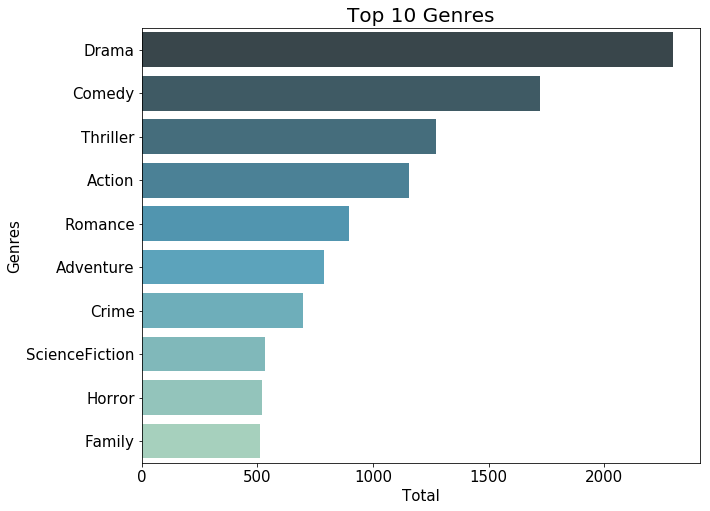

In [15]:
list1=[]
for i in movie_merge['genres']:
    list1.extend(i)
gen_list=pd.Series(list1).value_counts()[:10].sort_values(ascending=False)
gen_df = pd.DataFrame(gen_list)
gen_df.rename(columns={0:'Total'},inplace=True)
plt.subplots(figsize=(10,8)            )
sns.barplot(y=gen_df.index,x='Total',data=gen_df,palette='GnBu_d')
plt.xticks(fontsize=15)# 
plt.yticks(fontsize=15)
plt.xlabel('Total',fontsize=15)
plt.ylabel('Genres',fontsize=15)
plt.title('Top 10 Genres',fontsize=20)
plt.show()
 

In [16]:
pd.Series(list1).value_counts().sort_values(ascending=False)

Drama             2297
Comedy            1722
Thriller          1274
Action            1154
Romance            894
Adventure          790
Crime              696
ScienceFiction     535
Horror             519
Family             513
Fantasy            424
Mystery            348
Animation          234
History            197
Music              185
War                144
Documentary        110
Western             82
Foreign             34
                    28
TVMovie              8
dtype: int64

In [17]:
l=[]
for i in list1:
    if i not in l:
        l.append(i)

In [18]:
len(l)

21

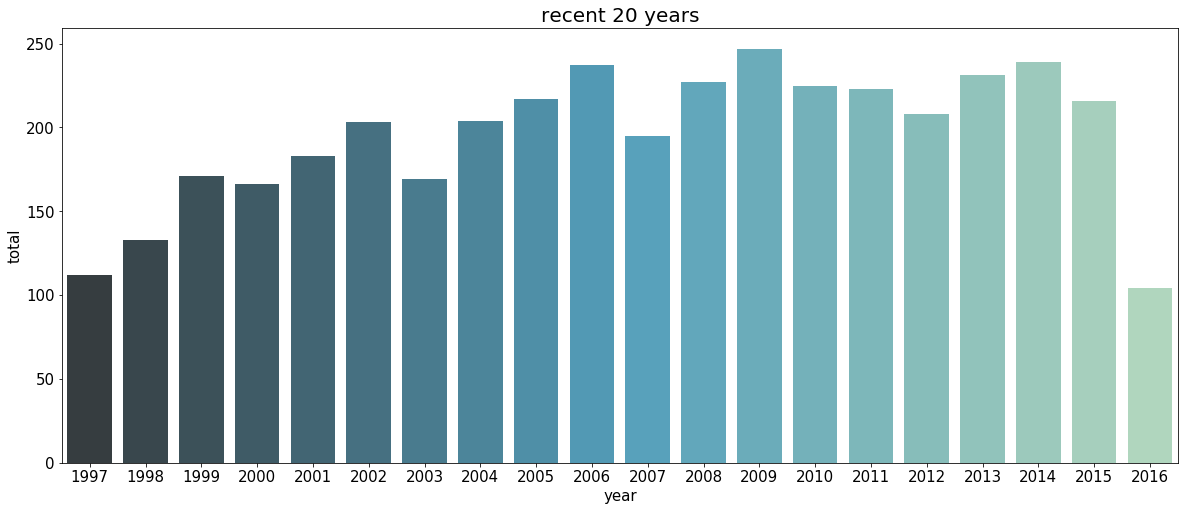

In [133]:
year_list=movie_merge['release_year'].value_counts()[0:20].sort_values(ascending=False)
year_df = pd.DataFrame(year_list)

# year_df.rename(columns={0:'Total'},inplace=True)
 
plt.subplots(figsize=(20,8)            )
sns.barplot(x=year_df.index,y='release_year',data=year_df,palette='GnBu_d')
plt.xticks(fontsize=15)# 
plt.yticks(fontsize=15)
plt.xlabel('year',fontsize=15)
plt.ylabel('total',fontsize=15)
plt.title('recent 20 years',fontsize=20)
plt.show()

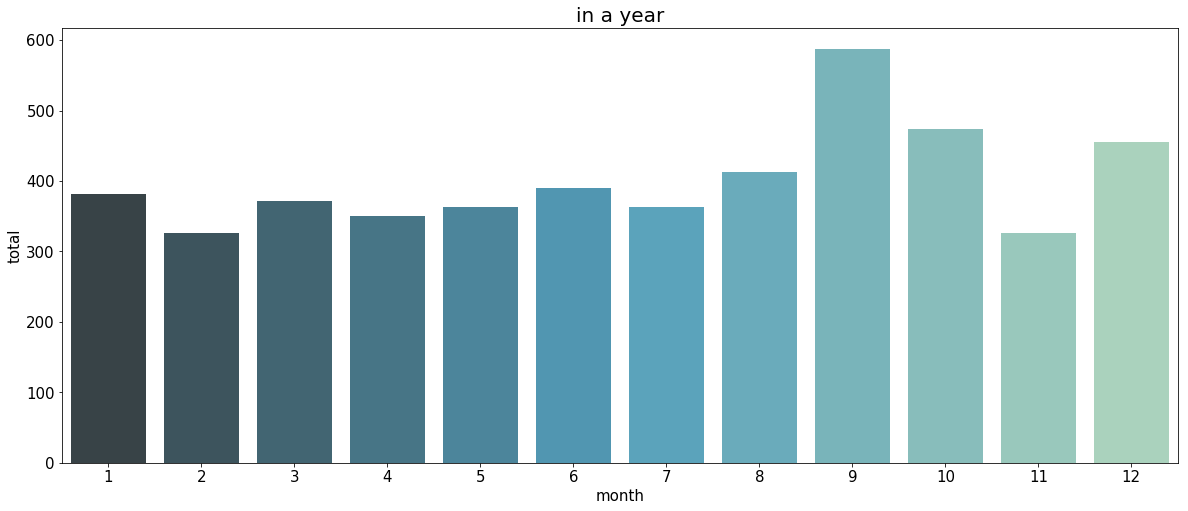

In [198]:
year_list=movie_merge['release_month'].value_counts().sort_values(ascending=False)
year_df = pd.DataFrame(year_list)

# year_df.rename(columns={0:'Total'},inplace=True)
 
plt.subplots(figsize=(20,8)            )
sns.barplot(x=year_df.index,y='release_month',data=year_df,palette='GnBu_d')
plt.xticks(fontsize=15)# 
plt.yticks(fontsize=15)
plt.xlabel('month',fontsize=15)
plt.ylabel('total',fontsize=15)
plt.title('in a year',fontsize=20)
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


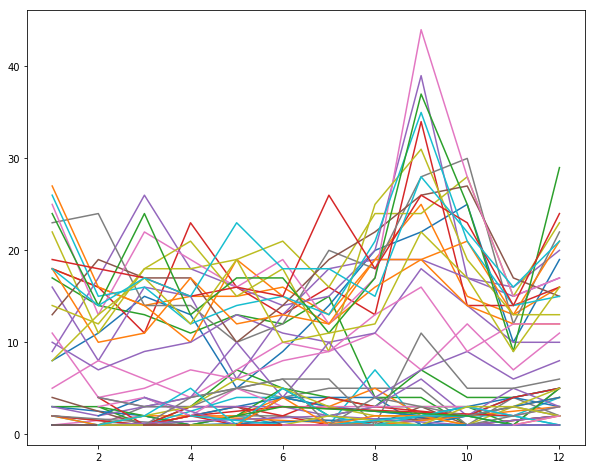

In [196]:
# time_df=pd.DataFdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABKQAAAH/CAYAAABpUgVDAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzs3Xu0pXdZJ/jvQ8UQCnIjKUQkEG52iLTQEnFAEUlACEyIzZBBHVuR1cYoNI5B2hAJHaKYBAcYTISQZhBsh0bA2BA0xhRXkYsUKjKGxMjFcI0JXbEMFUIIz/yx91lst6euOee3zzn1+ax11j779z7vu5/9rrOqzv6e3/t7q7sDAAAAAKPcZdENAAAAAHBgEUgBAAAAMJRACgAAAIChBFIAAAAADCWQAgAAAGAogRQAAAAAQwmkAIADUlUdW1VdVW9YdC8AAAcagRQAAAAAQx206AYAABbkC0kemuSfFt0IAMCBprp70T0AAAAAcABxyR4AcEDa1RpSVfWG6fixVfVzVfWJqvpaVd1QVZdW1eH78Br3qaoXV9WfV9WXq+rrVfXFqnpTVT10H47z4aq6o6qO3cX2X572/Py58ftW1cVV9emquq2qvlJV76iq77uzvc6ev6r6rqr6/ar6x6r6ZlX98N6+NwDgwCSQAgBY3sumXx9P8tuZXOL3s0n+cB+O8UNJzkpyc5I/SPLKJB9O8owkH62qh+/lcV6dye9tP7uL7f8xyW1J3rg0UFXfm+Svk/xCkmuTXJTk8mlPH6iqp6xQrw9K8pEkxyb5f5NcmmTHXr4vAOAA5ZI9AOCANJ1t9Jkkb+zuZ82MvyHJTyf5XJIf7O7rp+MHJXl3kscm+f7u/ou9eI17Jbm1u/95bvzhSf48yZ9198l7cZy7ZhKI3Z7kft19+8y2H07yniRv6u7/Y6bXa5LcN8mTuvt9M/X3SfLRTAKuY7v7tv3pdeb8Jcn53X32nt4HAMASM6QAAJZ33lIYlSTd/Y0kvzN9+qi9OUB3/+N8wDMd/3gm4dbjq+rb9uI4t01f+95Jnja3+eemj6+dGXtqJjOXLpoNo6bH+mImM7/uneSkFej1hiQv2dN7AACY5S57AADL27bM2Oemj0fu7UGq6qlJzkhyQpKj869//zo6yZf24lCvSfL8TAKoP5ge++gk/z7JJ7v7/TO1j54+3r+qzl3mWA+ZPj40yR/fyV4/vjTLCgBgbwmkAACWd/MyY9+YPm7amwNU1fOSvCrJ9iRXJbk+yc4kneRHkzw8yV335ljd/emqujLJk6rqQd39qSTPmu7/2rnyo6aPp+3hsPdYgV6/vDf9AwDMEkgBAKyC6TpOL8kksPne7v7S3PZHL7vj7r0myZMzWdz8rEwWM/9akt+dq/un6eOp3f2OVe7VgqQAwD6zhhQAwOo4OskRST64TMBzjyTfux/HfGcmM5d+pqp+JMm/SfKW7t4+V/fh6eNjF9grAMAuCaQAAFbHP2Zyydsjp6FOkmS6MPirMgmB9kl3fzPJpUnuleT10+FLlil9e5JPJXlOVT1luWNV1aOravNq9QoAsDsu2QMAWAXd/c2q+q1MLq37RFW9PcnBSR6f5J5J3jP9fl+9LsmLk3xnkk9094eWee3bq+rpSa5M8kdV9cEkf51J6HRMku9L8sAk35Fk5yr2CgCwLDOkAABWzzmZ3Bnv1kzujvf0TO7e96hMLr3bZ919Q751Z7z5xcxn6/4mk4XIL0xyeJKfSfLzSR6Z5K+S/IckN61mrwAAu1Ld1qEEAFgvquouSf4+ybcn+Y7u3rHglgAA9pkZUgAA68szkjwgye8KowCA9coMKQCAdaCqzspkPafTM1kH9Lu7+x8W2xUAwP4RSAEArANV1UluT3J1khd091ULbgkAYL8JpAAAAAAYyhpSAAAAAAx10KIbWJSjjz66jz322EW3AQAAALBhfOxjH7upu7fsqe6ADaSOPfbYbNu2bdFtAAAAAGwYVbVXN11xyR4AAAAAQwmkAAAAABhKIAUAAADAUAIpAAAAAIYaHkhV1UFVdVZVXVdVt1XV56vqlXM1VVVnV9XnqurWqnp/VT1imWMdX1XvqqqdVfXFqjqvqjaNezcAAAAA7KtF3GXvd5KclOQlSa5JckyS4+dqzkpyTpIXTGvOTLK1qh7W3V9Okqo6MsnWJFcnOTXJg5K8PJOQ7UWr/zYAAAAA2B9DA6mqenKSH0vy8O6+ehc1h2QSSJ3f3RdPxz6U5LNJnptvhU1nJLlbkqd3944kV1XVYUnOraqXTccAAAAAWGNGX7L37CTv3lUYNfWYJIclecvSQHd/NcnlSU6eqTs5yZVzwdObMwmpHrdiHQMAAACwokYHUt+f5O+q6uKq2jFd++myqrrPTM1xSe5Ict3cvp+cbputu2a2oLuvT7Jzrg4AAACANWR0IHXvJM9K8ohMLt37mSSPTPKHVVXTmiOT3NLdd8ztuz3J5qo6eKbu5mVeY/t0GwAAAABr0OhFzWv6dWp3fyVJqupLSd6X5MQk75rW9S72nd+2q7rlxlNVpyc5PUnud7/77WvvAAAAAKyA0TOktif5xFIYNfWBJF/Pt+60tz3JoVW1aW7fI5Ls7O7bZ+qOWOY1Ds/yM6fS3Zd29wndfcKWLVv29z0AAAAAcCeMDqQ+uYvxSvLN6ffXJNmU5MFzNfNrRl2TubWiquqYJHefqwMAAABgDRkdSL0zyfdU1dEzYz+U5NuSfHz6/INJdiQ5bamgqjYnOSXJFTP7XZHkSVV16MzYM5PcmsklgAAAAACsQaMDqUuTfCXJ5VV1SlX9RJL/lmRrd38gSbr7a0kuSHJ2VT2nqk5K8tZprxfNHOuSJLcluayqnjBdH+rcJK/o7h3D3hEAAAAA+2TooubdvaOqTkzyW0nenMnaUW9P8ktzpRdkEkC9MMlRSbYleWJ33zBzrO3TsOriJJdnsm7UKzMJpQAAAABYo6p72RvSbXgnnHBCb9u2bdFtAAAAAGwYVfWx7j5hT3WjL9kDAAAA4AAnkAIAAABgqKFrSAEAAOyvs//oqkW3sG78xlOfuOgWAHbLDCkAAAAAhhJIAQAAADCUQAoAAACAoQRSAAAAAAwlkAIAAABgKIEUAAAAAEMJpAAAAAAYSiAFAAAAwFACKQAAAACGEkgBAAAAMJRACgAAAIChBFIAAAAADCWQAgAAAGAogRQAAAAAQwmkAAAAABhKIAUAAADAUAIpAAAAAIYSSAEAAAAwlEAKAAAAgKEEUgAAAAAMJZACAAAAYCiBFAAAAABDCaQAAAAAGEogBQAAAMBQAikAAAAAhhJIAQAAADCUQAoAAACAoQRSAAAAAAwlkAIAAABgKIEUAAAAAEMJpAAAAAAYSiAFAAAAwFACKQAAAACGEkgBAAAAMJRACgAAAIChBFIAAAAADCWQAgAAAGAogRQAAAAAQwmkAAAAABhKIAUAAADAUAIpAAAAAIYSSAEAAAAwlEAKAAAAgKEEUgAAAAAMJZACAAAAYCiBFAAAAABDCaQAAAAAGEogBQAAAMBQAikAAAAAhhJIAQAAADCUQAoAAACAoQRSAAAAAAwlkAIAAABgKIEUAAAAAEMJpAAAAAAYanggVVXPqqpe5uuMmZqqqrOr6nNVdWtVvb+qHrHMsY6vqndV1c6q+mJVnVdVm8a+IwAAAAD2xUELfO0Tk9w68/zTM9+fleScJC9Ick2SM5NsraqHdfeXk6SqjkyyNcnVSU5N8qAkL88kZHvRqncPAAAAwH5ZZCD10e6+ZX6wqg7JJJA6v7svno59KMlnkzw33wqbzkhytyRP7+4dSa6qqsOSnFtVL5uOAQAAALDGrMU1pB6T5LAkb1ka6O6vJrk8yckzdScnuXIueHpzJiHV4wb0CQAAAMB+WGQg9amq+kZVXVtVPzczflySO5JcN1f/yem22bprZgu6+/okO+fqAAAAAFhDFnHJ3pcyWR/qL5JsSvLjSS6pqs3d/cokRya5pbvvmNtve5LNVXVwd399WnfzMsffPt0GAAAAwBo0PJDq7iuTXDkzdEVV3TXJi6rqVUtly+xay2zbVd1y46mq05OcniT3u9/99qVtAAAAAFbIWllD6m1J7pnk2ExmOB1aVZvmao5IsrO7b58+3z4dm3d4lp85le6+tLtP6O4TtmzZsiKNAwAAALBv1kogtaQzWRdqU5IHz22bXzPqmsytFVVVxyS5+1wdAAAAAGvIWgmk/rckNyX5hyQfTLIjyWlLG6tqc5JTklwxs88VSZ5UVYfOjD0zya1J3rfaDQMAAACwf4avIVVVf5DJguZ/k8lMqGdOv57X3d9M8rWquiDJOVW1PZPZTmdmEp5dNHOoS5I8L8llVXVhkgcmOTfJK7p7x6C3AwAAAMA+WsRd9q5N8uwkx2SyAPnVSX6qu//bTM0FmQRQL0xyVJJtSZ7Y3TcsFXT39qo6KcnFSS7PZN2oV2YSSgEAAACwRi3iLntnJzl7DzWd5KXTr93VXZ3kxJXrDgAAAIDVtlbWkAIAAADgACGQAgAAAGAogRQAAAAAQwmkAAAAABhKIAUAAADAUAIpAAAAAIYSSAEAAAAwlEAKAAAAgKEEUgAAAAAMJZACAAAAYCiBFAAAAABDHbToBgAAAFibLnz31kW3sG78yolPWHQLsK6YIQUAAADAUAIpAAAAAIYSSAEAAAAwlEAKAAAAgKEEUgAAAAAMJZACAAAAYCiBFAAAAABDCaQAAAAAGEogBQAAAMBQAikAAAAAhhJIAQAAADCUQAoAAACAoQ5adAMAAAAAi/LWT7x70S2sG6f92xNX7FhmSAEAAAAwlEAKAAAAgKEEUgAAAAAMJZACAAAAYCiBFAAAAABDCaQAAAAAGEogBQAAAMBQAikAAAAAhhJIAQAAADCUQAoAAACAoQRSAAAAAAwlkAIAAABgKIEUAAAAAEMJpAAAAAAYSiAFAAAAwFACKQAAAACGEkgBAAAAMJRACgAAAIChBFIAAAAADCWQAgAAAGAogRQAAAAAQwmkAAAAABhKIAUAAADAUAIpAAAAAIYSSAEAAAAwlEAKAAAAgKEEUgAAAAAMJZACAAAAYCiBFAAAAABDHbToBgAAYD16ztu2LrqFdeO3n/GERbcAwBpjhhQAAAAAQwmkAAAAABhqoYFUVX1nVd1SVV1V95gZr6o6u6o+V1W3VtX7q+oRy+x/fFW9q6p2VtUXq+q8qto09l0AAAAAsC8WPUPqN5Pcssz4WUnOSXJhklOmNVur6t5LBVV1ZJKtSTrJqUnOS/L8JC9Z5Z4BAAAAuBMWFkhV1WOTPDnJ/zU3fkgmgdT53X1xd29NclomwdNzZ0rPSHK3JE/v7qu6+5JMwqgzq+qwEe8BAAAAgH23kEBqelndRZnMarppbvNjkhyW5C1LA9391SSXJzl5pu7kJFd2946ZsTdnElI9bhXaBgAAAGAFLGqG1BlJDkny28tsOy7JHUmumxv/5HTbbN01swXdfX2SnXN1AAAAAKwhB41+wao6KsmvJfnJ7r69quZLjkxyS3ffMTe+Pcnmqjq4u78+rbt5mZfYPt0GAAAAwBq0iBlSL03yke7+493U9DJjtcy2XdUtN56qOr2qtlXVthtvvHGvmgUAAABgZQ0NpKrqu5M8O8lLquqIqjoiyebp5sOr6m6ZzHA6dLrO1Kwjkuzs7tunz7dPx+YdnuVnTqW7L+3uE7r7hC1bttzZtwMAAADAfhh9yd5Dknxbkg8ts+3zSf6fJG9KsinJg5NcO7N9fs2oazK3VlRVHZPk7nN1AAAAAKwhowOpDyR5/NzYk5P8SpKnJPl0kn9IsiPJaUl+PUmqanOSU5JcOrPfFUleUFWHdvc/T8eemeTWJO9brTcAAAAAwJ0zNJDq7puSvHd2rKqOnX77Z919y3TsgiTnVNX2TGY7nZnJ5YUXzex6SZLnJbmsqi5M8sAk5yZ5RXfvWLU3AQAAAMCdMvwue3vpgkwCqBcmOSrJtiRP7O4blgq6e3tVnZTk4iSXZ7Ju1CszCaUAAAAAWKMWHkh19xuSvGFurDO5G99L97Dv1UlOXK3eAAAAAFh5Cw+kAICN5+mveceiW1g3Lvv5py26BQCA4e6y6AYAAAAAOLAIpAAAAAAYSiAFAAAAwFACKQAAAACGEkgBAAAAMJS77O3Go5/w5EW3sG58aOufLLoFAAAAYJ0wQwoAAACAoQRSAAAAAAwlkAIAAABgKIEUAAAAAEMJpAAAAAAYSiAFAAAAwFAHLboBYLFOOv35i25h3XjXpS9fdAsAAAAbghlSAAAAAAwlkAIAAABgKIEUAAAAAEMJpAAAAAAYSiAFAAAAwFDusgfAhnfKb7xu0S2sG5ef/R8X3QL76Sd/b+uiW1g3fu8nn7DoFgDggGeGFAAAAABDCaQAAAAAGEogBQAAAMBQAikAAAAAhhJIAQAAADCUQAoAAACAoQRSAAAAAAwlkAIAAABgqIMW3QDAgebJ//n8RbewbvzJy1646BYAAIBVYIYUAAAAAEMJpAAAAAAYSiAFAAAAwFACKQAAAACGEkgBAAAAMJRACgAAAIChBFIAAAAADCWQAgAAAGAogRQAAAAAQwmkAAAAABhKIAUAAADAUAIpAAAAAIYSSAEAAAAwlEAKAAAAgKEO2t3Gqtq8Lwfr7p13rh0AAAAANrrdBlJJbknS+3C8TXeiFwAAAAAOAHsKpJ6dfQuk4E75odN+atEtrBvvf+vvLroFAABghV36kXctuoV14/TvP2nRLXAn7DaQ6u43DOoDAAAAgAOERc0BAAAAGGpPl+z9C1X1zCQ/m+S7khwyv72777VCfQEAAACwQe31DKmq+okkb0zy90num+QdSd45PcaOJBevRoMAAAAAbCz7csneC5L8WpLnTJ+/urufneQBSW5KsnOFewMAAABgA9qXQOohSf68u+9IckeSw5Kku/85yYVJnrvy7QEAAACw0exLIPVPSe46/f4LSR46s62SHLVSTQEAAACwce3LoubbknxPkiszWT/qxVX1jSRfT/LiJB9Z+fYAAAAA2Gj2JZA6P8n9p9+/ePr9q5NsSvLRJD+3sq0BAAAAsBHtdSDV3R9O8uHp9zcnObWq7prkrt29Y5X6AwAAAGCD2es1pKrq9VX1gNmx7r6tu3dU1f2r6vUr3x4AAAAAG82+LGr+rCRbdrHt6CQ/fae7AQAAAGDD25dAKkl6F+MPS3LjnnauqmdU1Qer6itV9bWquraqXlRVB8/UVFWdXVWfq6pbq+r9VfWIZY51fFW9q6p2VtUXq+q8qtq0j+8HAAAAgMF2u4ZUVf1ikl+cPu0k/6OqbpsrOyTJtyd5w1683lFJ3pPkN5PcnORRSc5Ncu8kz53WnJXknCQvSHJNkjOTbK2qh3X3l6d9HZlka5Krk5ya5EFJXp5JwPaivegDAAAAgAXZ06LmVyf5gySVSTD0niRfmqv5eibB0Vv29GLd/dq5ofdU1WFJnlNV/ynJXTMJpM7v7ouTpKo+lOSzmQRWS2HTGUnuluTp0wXVr5oe59yqeplF1gEAAADWrt0GUt19VZKrkqSq/jnJ67r7Cyvcw1eSLF2y95gkh2Um3Orur1bV5UlOzrcCqZOTXDkXPL05yYVJHpfk8hXuEQAAAIAVstdrSHX3S7r7C1V1cFU9sqqeOH08eM97/0tVtamqNlfVDyZ5XpLXdHcnOS7JHUmum9vlk9NtS47LZFbWbH/XJ9k5VwcAAADAGrNPi5pX1X9OckOSv0hyZZKPJrmhql6wj6/71enXnyV5XybrRSXJkUlu6e475uq3J9k8E34dmckaVPO2T7ftqv/Tq2pbVW278cY9rsEOAAAAwCrY60Cqqv7PJOcneVOSxyd5aJIfnj4/v6qetw+v+5gkj03y/EwWJb94Zttyd/KrZbbtqm5XdwJMd1/a3Sd09wlbtmzZh3YBAAAAWCl7WtR81nOSXNDdvzozdm2S91fVzZlcevdbe3Og7v7L6bcfqKqbkryxql6eyQynQ6tq09wsqSOS7Ozu26fPt0/H5h2e5WdOAQAAALBG7Msle8dkcpe95bw3yX33s4elcOoBmawLtSnJg+dq5teMuiZza0VV1TFJ7j5XBwAAAMAasy+B1PVJfmQX25443b4/fmD6+JkkH0yyI8lpSxuranOSU5JcMbPPFUmeVFWHzow9M8mtmaxJBQAAAMAatS+X7P1Wkt+qqnsmeVsmi5vfK5Pw6FmZXLK3W1X1J0m2JvnbTO6m9wOZrCP1+939qWnNBUnOqartmcx2OjOT4OyimUNdMn29y6rqwiQPTHJukld09459eE8AAAAADLbXgVR3X1xVtyX5L0mencni4ZXki0nO6O7X7cVhPppJeHVskm8k+XSSF2YSMC25IJMA6oVJjkqyLckTu/uGmV62V9VJmSyGfnkm60a9MpNQCgAAAIA1bK8Dqap6cZLXTb/um+Q7knwpyeeT3LuqXtzd5+3uGN19TpJz9lDTSV46/dpd3dVJTtzb/gEAAABYG/ZlDan/kuS+PfG57v6L6WMnuc90OwAAAADs1r4EUpXJZXrLuW+S7Xe+HQAAAAA2ut1esldVP53kp6dPO8lrqmp+0fBDkvzbJH+68u0BAAAAsNHsaQ2pnUm+Mv2+kvxTkv85V/P1JFckefXKtgYAAADARrTbQKq735rkrUlSVb+T5Lzu/syIxgAAAADYmPb6Lnvd/TOr2QgAAAAAB4Z9WdQcAAAAAO40gRQAAAAAQwmkAAAAABhKIAUAAADAUAIpAAAAAIYSSAEAAAAwlEAKAAAAgKEEUgAAAAAMJZACAAAAYCiBFAAAAABDCaQAAAAAGEogBQAAAMBQAikAAAAAhhJIAQAAADCUQAoAAACAoQRSAAAAAAwlkAIAAABgKIEUAAAAAEMJpAAAAAAYSiAFAAAAwFACKQAAAACGEkgBAAAAMJRACgAAAIChBFIAAAAADCWQAgAAAGAogRQAAAAAQwmkAAAAABhKIAUAAADAUAIpAAAAAIYSSAEAAAAwlEAKAAAAgKEEUgAAAAAMJZACAAAAYCiBFAAAAABDCaQAAAAAGEogBQAAAMBQAikAAAAAhhJIAQAAADCUQAoAAACAoQRSAAAAAAwlkAIAAABgKIEUAAAAAEMJpAAAAAAYSiAFAAAAwFACKQAAAACGEkgBAAAAMJRACgAAAIChBFIAAAAADCWQAgAAAGAogRQAAAAAQwmkAAAAABhqaCBVVadV1Tuq6gtVdUtVfayqfnyZup+tquuq6mvTmpOWqfnOqvrD6XFuqqqLq2rzmHcCAAAAwP4aPUPqzCS3JPmlJE9L8p4kb6qq/7RUUFU/luSSJL+b5OQkf5vknVX1sJmag5JcmeT+SZ6Z5BeTnJbk0jFvAwAAAID9ddDg1zulu2+aef7uqrpPJkHVRdOxlyR5Y3f/WpJU1fuS/LskZyX5yWnNaUkemuTB3f2Zad3tSd5cVS/p7utW/60AAAAAsD+GzpCaC6OW/FWSeyVJVT0wyXclecvMPt9M8tZMZkstOTnJR5fCqKn/keTrSZ68wm0DAAAAsILWwqLmj0ly9fT746aP18zVfDLJPatqy0zdv6jp7q8n+dTMMQAAAABYgxYaSE0XKz81yW9Ph46cPt48V7p9bvuRy9Qs1R25zDgAAAAAa8TCAqmqOjbJm5K8vbvfMLe558uXGZ+vWapbbnzpNU+vqm1Vte3GG2/cp34BAAAAWBkLCaSq6p5Jrkhyfb61UHnyrZlQR8ztsvT85pm6+ZqluuVmTiVJuvvS7j6hu0/YsmXLrsoAAAAAWEXDA6mq2pzknUkOTvLU7v7qzOaldaHm14E6Lsn/7O4bZ+r+RU1VHZzkgfnX608BAAAAsIYMDaSq6qBM7pj3kCQnd/c/zm7v7k8n+bskp83sc5fp8ytmSq9I8n1Vdf+ZsacluWuSP1md7gEAAABYCQcNfr1XJ3lKkl/M5K55/8vMtr/q7tuSnJvk96rqs0n+PMlPZxJg/cRM7duS/GqSy6rqnCSHJ3llkjd193Wr/SYAAAAA2H+jA6kfmT6+apltD0jy2e7+71V1jyS/kuScJH+b5H/t7v9vqbC7b6+qJye5OMlbktyW5M1JXrCazQMAAABw5w0NpLr72L2s+69J/useaj6f5EdXoC0AAAAABlrIXfYAAAAAOHAJpAAAAAAYSiAFAAAAwFACKQAAAACGEkgBAAAAMJRACgAAAIChBFIAAAAADCWQAgAAAGAogRQAAAAAQwmkAAAAABhKIAUAAADAUAIpAAAAAIYSSAEAAAAwlEAKAAAAgKEEUgAAAAAMJZACAAAAYCiBFAAAAABDCaQAAAAAGEogBQAAAMBQAikAAAAAhhJIAQAAADCUQAoAAACAoQRSAAAAAAwlkAIAAABgKIEUAAAAAEMJpAAAAAAYSiAFAAAAwFACKQAAAACGEkgBAAAAMJRACgAAAIChBFIAAAAADCWQAgAAAGAogRQAAAAAQwmkAAAAABhKIAUAAADAUAIpAAAAAIYSSAEAAAAwlEAKAAAAgKEEUgAAAAAMJZACAAAAYCiBFAAAAABDCaQAAAAAGEogBQAAAMBQAikAAAAAhhJIAQAAADCUQAoAAACAoQRSAAAAAAwlkAIAAABgKIEUAAAAAEMJpAAAAAAYSiAFAAAAwFACKQAAAACGEkgBAAAAMJRACgAAAIChBFIAAAAADCWQAgAAAGAogRQAAAAAQwmkAAAAABhqeCBVVQ+uqtdW1cer6o6qeu8yNVVVZ1fV56rq1qp6f1U9Ypm646vqXVW1s6q+WFXnVdWmIW8EAAAAgP2yiBlS353kKUn+bvq1nLOSnJPkwiSnJLklydaquvdSQVUdmWRrkk5yapLzkjw/yUtWrXMAAAAA7rRFBFKXd/cx3X1akr+d31hVh2QSSJ3f3Rd399Ykp2USPD13pvSMJHdL8vTuvqq7L8kkjDqzqg5b9XcBAAAAwH4ZHkh19zf3UPKYJIclecvMPl9NcnmSk2fqTk5yZXfvmBl7cyYh1eNWplsAAAAAVtpaXNT8uCR3JLlubvyT022zddfMFnT39Ul2ztUBAAAAsIasxUDqyCS3dPcdc+Pbk2yuqoOpnEIAAAAQwElEQVRn6m5eZv/t023/SlWdXlXbqmrbjTfeuGINAwAAALD31mIglUzWi5pXy2zbVd1y4+nuS7v7hO4+YcuWLXeyRQAAAAD2x1oMpLYnObSqNs2NH5FkZ3ffPlN3xDL7H57lZ04BAAAAsAasxUDqmiSbkjx4bnx+zahrMrdWVFUdk+Tuc3UAAAAArCFrMZD6YJIdSU5bGqiqzUlOSXLFTN0VSZ5UVYfOjD0zya1J3jegTwAAAAD2w0GjX3AaLj1l+vQ7kxxWVc+YPv/j7t5ZVRckOaeqtmcy2+nMTMKzi2YOdUmS5yW5rKouTPLAJOcmeUV371j9dwIAAADA/hgeSCW5V5K3zo0tPX9Aks8muSCTAOqFSY5Ksi3JE7v7hqUdunt7VZ2U5OIkl2eybtQrMwmlAAAAAFijhgdS3f3ZfOuOebuq6SQvnX7tru7qJCeuWHMAAAAArLq1uIYUAAAAABuYQAoAAACAoQRSAAAAAAwlkAIAAABgKIEUAAAAAEMJpAAAAAAYSiAFAAAAwFACKQAAAACGEkgBAAAAMJRACgAAAIChBFIAAAAADCWQAgAAAGAogRQAAAAAQwmkAAAAABhKIAUAAADAUAIpAAAAAIYSSAEAAAAwlEAKAAAAgKEEUgAAAAAMJZACAAAAYCiBFAAAAABDCaQAAAAAGEogBQAAAMBQAikAAAAAhhJIAQAAADCUQAoAAACAoQRSAAAAAAwlkAIAAABgKIEUAAAAAEMJpAAAAAAYSiAFAAAAwFACKQAAAACGEkgBAAAAMJRACgAAAIChBFIAAAAADCWQAgAAAGAogRQAAAAAQwmkAAAAABhKIAUAAADAUAIpAAAAAIYSSAEAAAAwlEAKAAAAgKEEUgAAAAAMJZACAAAAYCiBFAAAAABDCaQAAAAAGEogBQAAAMBQAikAAAAAhhJIAQAAADCUQAoAAACAoQRSAAAAAAwlkAIAAABgKIEUAAAAAEMJpAAAAAAYSiAFAAAAwFACKQAAAACGEkgBAAAAMNS6DqSq6viqeldV7ayqL1bVeVW1adF9AQAAALBrBy26gf1VVUcm2Zrk6iSnJnlQkpdnErK9aIGtAQAAALAb6zaQSnJGkrsleXp370hyVVUdluTcqnrZdAwAAACANWY9X7J3cpIr54KnN2cSUj1uMS0BAAAAsCfrOZA6Lsk1swPdfX2SndNtAAAAAKxB6zmQOjLJzcuMb59uAwAAAGANqu5edA/7papuT/LL3f2qufEvJHlDd//qMvucnuT06dN/k+TaVW905R2d5KZFN3GAcc7Hc87Hc87Hc87Hc87Hc87Hc87Hc87Hc87Hc87HW8/n/P7dvWVPRet5UfPtSY5YZvzwLD9zKt19aZJLV7Op1VZV27r7hEX3cSBxzsdzzsdzzsdzzsdzzsdzzsdzzsdzzsdzzsdzzsc7EM75er5k75rMrRVVVcckuXvm1pYCAAAAYO1Yz4HUFUmeVFWHzow9M8mtSd63mJYAAAAA2JP1HEhdkuS2JJdV1ROm60Odm+QV3b1joZ2trnV9yeE65ZyP55yP55yP55yP55yP55yP55yP55yP55yP55yPt+HP+bpd1DxJqur4JBcneXQm60a9Lsm53X3HQhsDAAAAYJfWdSAFAAAAwPqzni/ZO2BU1YOr6rVV9fGquqOq3rvonja6qjqtqt5RVV+oqluq6mNV9eOL7msjq6pnVNUHq+orVfW1qrq2ql5UVQcvurcDQVV95/RnvavqHovuZ6OqqmdNz/H81xmL7m0jq6qDquqsqrquqm6rqs9X1SsX3ddGVVXv3cXPeVfVoxfd30ZVVT9WVX85/bf8C1X1u1V1n0X3tZFV1Y9W1d9M/135TFWdueieNpK9+QxUE2dX1eeq6taqen9VPWIB7W4Ie3nOf6Gq/mj6O3tX1Q+P73Rj2NP5rqrvqKrfnG6/Zfpz/saN9G/7QYtugL3y3UmekuTDSXw4H+PMJJ9J8ktJbsrk/L+pqo7u7osW2tnGdVSS9yT5zUwuwX1UJuvC3TvJcxfX1gHjN5PcksmdSll9J2ZyE44ln15UIweI30lyUpKXZHIn3mOSHL/Qjja2X0hy2NzYeUn+XZKPjm9n46uqpyX570l+O8kLknxHkl9P8s6qOqG7v7nI/jaiqvqBJJcleX2SX07y/UkurKpvdvf/vdDmNo69+Qx0VpJzMvm5vyaT3+G3VtXDuvvLQ7rcWPbmnP9Ukk5yZRJ/sL9z9nS+H5nk32eyNNFHknx7Jp+PPjj9Gb9lUJ+rxiV760BV3WXpF4mqeluSo7v7hxfb1cY2DZ5umht7U5JHd/cDFtTWAaeqXprkOUmObP9YrZqqemyStyf5jUyCqUM3wn9wa1FVPSuTcMQ5HqSqnpzk8iQP7+6rF93PgWg60/XLSX6/u39+0f1sRFX15iQP6e5Hzow9LZN/24/v7k8urLkNqqquTHK37v6hmbFXJHlWknt399cX1dtGsafPQFV1SJIbkry8u8+bjt09yWeTvLa7XzS86XVubz53LtVU1cOSfCLJ47v7vcOb3QD24mf8iCS3dPc3Zsa+K8m1SZ7V3W8c3PKKc8neOuCvWuPNh1FTf5XkXqN7OcB9JWYFrqqq2pTkokxmLyz3cw/r3bOTvFsYtVBPTnJkJjN4WB3fluSf5sZunj7W4F4OFI9IsnVu7E8z+Vl3aeoK2IvPQI/JZDbmW2b2+Womf4Q4eRVb27D25nOnz6YrZ0/nsrtvng2jpmN/l2RnNsjnUoEU7L3HJPGBZpVV1aaq2lxVP5jkeUleY3bUqjojySGZXObBOJ+qqm9M10r7uUU3s8F9f5K/q6qLq2pHVe2sqss20voL68CPJflCkj9bdCMb2OuTPLaqfqqqDpv+Bf3Xk7xHGLtqDkkyPwvqtunjQwf3cqA6LskdSa6bG//kdBtsOFX1PUk2Z4N8LhVIwV6oqpOSnBof2kf46vTrz5K8L5M1AVgFVXVUkl9LcmZ3377ofg4QX8pkrYv/kOSUTNYDuKSqfmmhXW1s987kEppHZBKM/EwmazL8YVWZObLKqmpzJj/rv++PC6unu/8ok5/zSzOZKXVtkk1Jnr7Atja6v0/yfXNjj5o+3nNwLweqIzO5nOmOufHtSTa7MQ4bTVXdJcmrMglh/3TB7awIi5rDHlTVsUnelOTt3f2GhTZzYHhMJqn/o5K8OMnFmSyQy8p7aZKPdPcfL7qRA0V3X5nJIqBLrqiquyZ5UVW9yjT4VVHTr1O7+ytJUlVfyiTwPjHJuxbY24HglCT3iMv1VlVVPT7JJZl8ULki31r49g+r6gnLfGDnzrskyWuq6meTvC2T31ueP93mfI+zXNBdu9kG69n5mVwS/LiN8sdkgRTsRlXdM5Nf7K5P8pMLbueA0N1/Of32A1V1U5I3VtXLu/tTi+xro6mq785kbZ0fmi6YmEyCwCQ5vKru6O5bl9+bFfa2JP97kmPjbnurYXuSTy+FUVMfyORSm+MjkFptP5bk77t726Ib2eBenuQd3f0rSwNV9deZ3HXs1EzuBsfKen2Shyd5TSYz03Ym+ZVM1mW8YYF9HUi2Jzm0qjbNha5HJNm5UT6wQ5JU1S9kcuXIj3f3Rxbdz0pxyR7swvQyg3dmsqj2U6eLJDLWUjjlzoYr7yGZLIL7oUx+odueb12S+vlMfqFmLH/JXR27urtYJTEjbRVV1eGZLCxsdtTqOy7JX88OdPe1SW5N8qCFdLTBdfcd3f3cJFuS/P/t3V2oHVcZh/HnD4G2weYihqq02gi5SEF60fpVU2y8sdLqRU1EqxdpLypWRVFRrBi/lQpCpVQp6YWNIm2IgkXjF9JGGkpoAiUpRsGqpwpG7UVriWlrxdeLtY4etifmnHSfmbrP84PNObNmZu13LzabmXfeWXMxrSrtYF998JQ7app+Rbs1ddNE++a+TpoJSbbRjs0/VlV7xo5nmqyQkhaRZA2wl3bSvqWq/jJySKvVlv73d6NGMZsOAG+YaHsT7eruVVipM6RttCccPjp2IDPqB8Bnk2xY8ATV19MSskfGC2tVuAY4CxNSQ3gUuGRhQ5KLgHOAuTECWi2qav6iznwFwwNVZTJkGA8ATwJvo03iv3Deul0jxiVNTZKtwLeB26rqKyOHM3UmpP4P9B/Wq/ri+cC6JNv78g+r6uQ4kc20r9PG/IPA+iSvXbDuoap6ZvHddKaS/Jj2+ORf0OZe2EKbi2GPt+tNXz8x37+wrc+XBnB/VZ0YOKRVIcl3gQeBo7Srum/vrw84f9SK2UV7Yuf3k3wJOBf4MvCzqjowamSz7x3Akao6VZWapud24JYkf+Q/c0h9ipaMcp7AFdCPDS+nVaatA64FruxtmoKlnAMluRnYmeRxWlXUh2l3AVnpfQaWOOavpE0z8NLefkWSDcCct2cvz+nGG7gQ+B7tu71n4pz0sVk4R4oPPHn+6yeJp6oQeXlVzQ0WzCqRZI72A7AYx3wFJPk87Wr6RuAftAqdbwC3OwfAMJJcRxvzc01IrYyeENlGO4gL7ZG9X62qb40a2IxLsgm4FbiCNnfUPcCHemWDVkA/OTkO7Kyqm8eOZ9b1J0a+B7iRdoveE7RK2JuqyorXFZDkUloi8CLa7b/3Ax+vqodHDWyGLOUcqH/3P0H77r8QOEy7yPPQIEHOmCWO+Z3AjkXW766q61Ymstl0uvEGttKOzRczE+NtQkqSJEmSJEmDclJzSZIkSZIkDcqElCRJkiRJkgZlQkqSJEmSJEmDMiElSZIkSZKkQZmQkiRJkiRJ0qBMSEmSJEmSJGlQJqQkSZJmQJLzknwmycaJ9q1JKskrxolMkiTpv5mQkiRJmg3nAZ8GNo4chyRJ0mmZkJIkSZIkSdKgTEhJkiRNQZI7kxxOcnWSY0lOJtmXZH2STUnuS/K3vs3FC/Zbm+TWJH9K8nSSQ0neONH3/iTfSfLOJI8keTLJj5Jc0NdvBB7um9/Xb9GriRA3JNmb5ESS3yZ57woOhyRJ0v9kQkqSJGl6XgZ8Dvgk8G7gdcAu4O7+2g6sAe5Okr7PHcD1wBeBa4A/APuSXD7R92uA9wMf6X1f0vsGOA68q///PuCy/lroDuBIf4/9wNeSvPo5fVpJkqQztGbsACRJkmbIeuCyqvoNQK+E+iiwo6q+2dsC7AM295zUtcD1VbW7r/8JcBTYCVy5oO91wNVV9Xjf7sXALUnOqaqnkhzt2x2rqoOLxHZXVX2h77sfeAvwVuDBaX14SZKkpbJCSpIkaXrm5pNR3SP9772LtJ0PvAoIsHd+ZVX9sy9PVkgdmk9GdccW9LMUP13wHs8CvwYuWOK+kiRJU2VCSpIkaXqemFj++yLt821nAy8BTlTVyYn9/gysTXLWEvo++znEttR9JUmSpsqElCRJ0niOAy9Isnai/UXAyap6ZoSYJEmSVpwJKUmSpPEcAoo22Tnw7zmmtgMHltnXciumJEmSRuOk5pIkSSOpql8muQu4Lck62vxSNwCbgRuX2d3vgaeAHUn+CjxbVYenGrAkSdKUWCElSZI0rhuA3bSn6t0DXAi8uaqWVSFVVU/3vi4Ffk6rvpIkSXpeSlWNHYMkSZIkSZJWESukJEmSJEmSNCgTUpIkSZIkSRqUCSlJkiRJkiQNyoSUJEmSJEmSBmVCSpIkSZIkSYMyISVJkiRJkqRBmZCSJEmSJEnSoExISZIkSZIkaVAmpCRJkiRJkjSofwHMDKUnUpjzRAAAAABJRU5ErkJggg==rame(movie_merge[['release_year','release_month','id']].groupby(['release_year','release_month']).count())
# time_df
time_df=movie_merge[['release_year','release_month','id']]
time_df["count"]=time_df.groupby(['release_year','release_month']).transform('count')
time_df=time_df.drop_duplicates(['release_year','release_month'])
time_df=time_df.sort_values("release_month")

# time_df[["count","release_month"]][time_df["release_year"]==2016]
 
plt.subplots(figsize=(10,8)            )
x=time_df["release_month"].drop_duplicates().sort_values(ascending=True)
year=time_df["release_year"].drop_duplicates()
for i in year:
    plt.plot(time_df["release_month"][time_df["release_year"]==i],time_df["count"][time_df["release_year"]==i])
# plt.legend(year)
plt.show()

In [200]:
movie_merge.head(2)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,movie_id,cast,crew,release_year,release_month
0,237000000,"[Action, Adventure, Fantasy, ScienceFiction]",http://www.avatarmovie.com/,19995,"culture clash,future,space war,space colony,so...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners,Twentieth Century Fox ...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"Jake Sully,Neytiri,Dr. Grace Augustine,Col. Qu...",James Cameron,2009,12
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"ocean,drug abuse,exotic island,east india trad...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"Captain Jack Sparrow,Will Turner,Elizabeth Swa...",Gore Verbinski,2007,5


In [282]:
genre_set=set(l)
genre_set.discard('')  #删除''字符
genre_df = pd.DataFrame()  # 创建空的数据框
for genre in genre_set:
    #如果一个值中包含特定内容，则编码为1，否则编码为0
    genre_df[genre] = movie_merge['genres'].map(lambda x:1 if genre in x else 0)
genre_df['release_year']=movie_merge['release_year']
genre_by_year = genre_df.groupby("release_year").sum()  
genresum_by_year = genre_by_year.sum().sort_values(ascending=False)
genre_df.head(2)

,Drama,War,Fantasy,Western,Action,Adventure,Animation,Family,Horror,Foreign,...,Thriller,Mystery,Music,Romance,Comedy,History,Crime,TVMovie,ScienceFiction,release_year
0,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2009
1,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2007


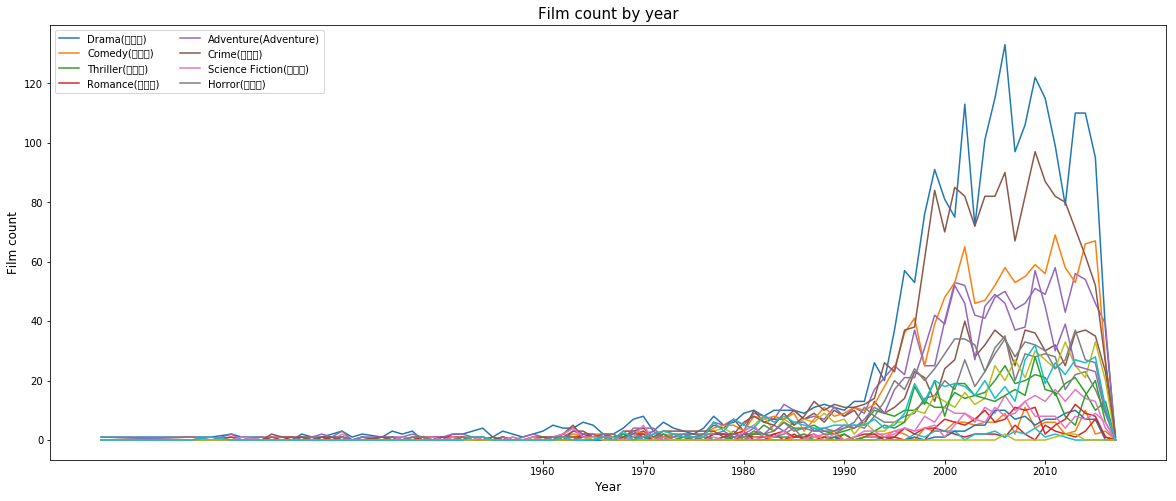

In [285]:
fig = plt.figure(figsize=(20,8))
# ax1 = plt.subplot(1,1,1)
plt.plot(genre_by_year)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Film count', fontsize=12)
plt.title('Film count by year', fontsize=15)
plt.xticks(range(1960, 2017, 10))  #横坐标每隔10年一个刻度
#plt.legend(loc='best',ncol=2) #https://blog.csdn.net/you_are_my_dream/article/details/53440964
plt.legend(['Drama(戏剧类)','Comedy(喜剧类)','Thriller(惊悚类)','Romance(浪漫类)',
                               'Adventure(Adventure)','Crime(犯罪类)', 'Science Fiction(科幻类)',
                               'Horror(惊恐类)'], loc='best',ncol=2) #设置说明标签


# create features and train model 

In [19]:
orignal_df=movie_merge.copy()
orignal_df.shape

(4803, 25)

In [20]:
partdf =movie_merge[["id","genres"]]
def one_hot_genre(genres_set,df):
    for gen in list(genres_set):
        df[gen]=0
    for gen in list(genres_set):
        if gen in df["genres"]:
            df[gen]=1
# 
    return df 

In [21]:
partdf2=partdf.apply(lambda x: one_hot_genre(l,x),axis=1)
partdf2.head(5)

,id,genres,Action,Adventure,Fantasy,ScienceFiction,Crime,Drama,Thriller,Animation,...,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TVMovie,
0,19995,"[Action, Adventure, Fantasy, ScienceFiction]",1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,285,"[Adventure, Fantasy, Action]",1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,206647,"[Action, Adventure, Crime]",1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,49026,"[Action, Crime, Drama, Thriller]",1,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,49529,"[Action, Adventure, ScienceFiction]",1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
partdf=pd.merge(partdf2,movie_merge,on="id")
partdf.head(2)

,id,genres_x,Action,Adventure,Fantasy,ScienceFiction,Crime,Drama,Thriller,Animation,...,status,tagline,title,vote_average,vote_count,movie_id,cast,crew,release_year,release_month
0,19995,"[Action, Adventure, Fantasy, ScienceFiction]",1,1,1,1,0,0,0,0,...,Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"Jake Sully,Neytiri,Dr. Grace Augustine,Col. Qu...",James Cameron,2009,12
1,285,"[Adventure, Fantasy, Action]",1,1,1,0,0,0,0,0,...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"Captain Jack Sparrow,Will Turner,Elizabeth Swa...",Gore Verbinski,2007,5


In [23]:
partdf.shape

(4803, 47)

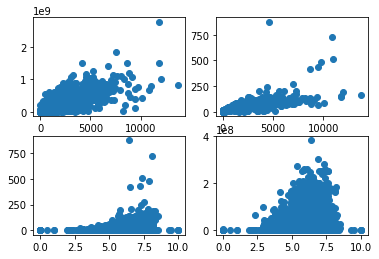

In [402]:
df_plt=movie_merge[['vote_average','vote_count','popularity', 'budget', 'revenue']]
plt.subplot(2,2,1)
plt.scatter(movie_merge['vote_count'],movie_merge['revenue'])
plt.subplot(2,2,2)
plt.scatter(movie_merge['vote_count'],movie_merge['popularity'])
plt.subplot(2,2,3)
plt.scatter(movie_merge['vote_average'],movie_merge['popularity'])
plt.subplot(2,2,4)
plt.scatter(movie_merge['vote_average'],movie_merge['budget'])

# train my models
# step 1:titles, tagline, directors, actors to predict genre. multiclsses.CNN
# step2: genre, budget,languane,company,country, directors,release_date, actors to predict vote_count/revenue. GLM

In [21]:
movie_merge.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew', 'release_year',
       'release_month'],
      dtype='object')

In [24]:
stop = [] 
file_stop = 'stop_words.txt'  #   
with open(file_stop,'r',encoding='utf-8-sig') as f :
    lines = f.readlines()  # l 
    for line in lines:
        lline  = line.strip()     #  
        stop.append(lline)        #  

In [25]:
def clean_words(words):
    word_list = str(words)
    for ch in string.punctuation:
        word_list = word_list.replace(ch,' ')
    word_list = word_list.strip().split()
    
    word_list_new = []
    for word in word_list:
        word_clean = word.lower()
        if word not in stop:            
#             word_clean = word_clean.replace('nan','')
#             trantab = str.maketrans({key: None for key in string.punctuation})
#             word_clean= word_clean.translate(trantab)
            word_list_new.append(word_clean)

    return ' '.join(word_list_new)

In [26]:
def feature_text(df):
    df["text"]=df["keywords"]+" "+df['original_title']+" "+df['overview']+" "+df['tagline']+" "+df['title']+" "+df['crew']
    df['text']=df['text'].apply(clean_words)
    return df

In [27]:
step0_df=feature_text(movie_merge)
step0_df.shape

(4803, 26)

In [28]:
step0_df["text"][1]

'ocean drug abuse exotic island east india trading company love life traitor shipwreck strong woman ship alliance calypso afterlife fighter pirate swashbuckler aftercreditsstinger pirates caribbean at world end captain barbossa believed dead life headed edge earth will turner elizabeth swann but at adventure pirates caribbean at world end gore verbinski'

In [613]:
movie_merge['original_title'][1]

"Pirates of the Caribbean: At World's End"

In [614]:
movie_merge['keywords'][1]

"ocean,drug abuse,exotic island,east india trading company,love of one's life,traitor,shipwreck,strong woman,ship,alliance,calypso,afterlife,fighter,pirate,swashbuckler,aftercreditsstinger"

In [29]:
len(step0_df["text"][1].split())

50

In [30]:
import tensorflow as tf
from gensim.models import Word2Vec
from tensorflow.contrib import learn

/opt/anaconda3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [31]:
def reshape(text):
    new_text = []
    for sentence in text:
        w_list = sentence.split()
        w_list_clean = [x for x in w_list]
        new_text.append(w_list_clean)
    return new_text
text_input = reshape(step0_df["text"])
 

In [32]:
model = Word2Vec(text_input,size =50,min_count=5,window=2,negative = 3)

In [33]:
req_count=5
for key in model.similar_by_word("crime", topn=10):
    if len(key[0]) == 3:
        req_count -= 1
        print(key[0], key[1])
        if req_count == 0:
            break
 

job 0.9981723427772522
she 0.9981314539909363


/opt/anaconda3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  


In [34]:
max_document_length = 50
vocab_processor = learn.preprocessing.VocabularyProcessor(max_document_length)
vp=vocab_processor.fit(step0_df["text"])
len(vocab_processor.vocabulary_)

Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please use tensorflow/transform or tf.data.


23702

In [35]:
x_all=np.array(list(vp.transform(step0_df["text"])))
x_all.shape

(4803, 50)

In [36]:
names=['Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'Crime',
 'Drama',
 'Thriller',
 'Animation',
 'Family',
 'Western',
 'Comedy',
 'Romance',
 'Horror',
 'Mystery',
 'History',
 'War',
 'Music',
 'Documentary',
 'Foreign',
 'TVMovie']

In [37]:
y_all=np.array(partdf[names])
y_all

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [110]:
# use all data 
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test=train_test_split(x_all,y_all,test_size=0.2,random_state=7)
x_train=x_all[:4000,:]
y_train=y_all[:4000,:]
x_test=x_all[4000:,:]
y_test=y_all[4000:,:]
x_dev=x_train
y_dev=y_train

In [111]:
x_test.shape

(803, 50)

In [288]:
import tensorflow as tf
import numpy as np


tf.reset_default_graph()

class TextCNN(object):
    """
    A CNN for text classification.
    Uses an embedding layer, followed by a convolutional, max-pooling and softmax layer.
    """
    def __init__(
      self, sequence_length, num_classes, vocab_size,
      embedding_size, filter_sizes, num_filters, l2_reg_lambda=0.0):

        # Placeholders for input, output and dropout
        self.input_x = tf.placeholder(tf.int64, [None, sequence_length], name="input_x")
        self.input_y = tf.placeholder(tf.float32, [None, num_classes], name="input_y")
        self.dropout_keep_prob = tf.placeholder(tf.float32, name="dropout_keep_prob")
        self.predic_y= tf.placeholder(tf.float32, [None, num_classes], name="predic_y")
       
        # Keeping track of l2 regularization loss (optional)
        l2_loss = tf.constant(0.0)

        # Embedding layer
        with tf.device('/cpu:0'), tf.name_scope("embedding"):
            self.W = tf.Variable(
                tf.random_uniform([vocab_size, embedding_size], -1.0, 1.0),
                name="W")
            self.embedded_chars = tf.nn.embedding_lookup(self.W, self.input_x)
            self.embedded_chars_expanded = tf.expand_dims(self.embedded_chars, -1)

        # Create a convolution + maxpool layer for each filter size
        pooled_outputs = []
        self.is_training = tf.placeholder(tf.bool,name="norm")
        for i, filter_size in enumerate(filter_sizes):
            with tf.name_scope("conv-maxpool-%s" % filter_size):
                # Convolution Layer
                filter_shape = [filter_size, embedding_size, 1, num_filters]
                W = tf.Variable(tf.truncated_normal(filter_shape, stddev=0.1), name="W")
                b = tf.Variable(tf.constant(0.1, shape=[num_filters]), name="b")
                conv = tf.nn.conv2d(
                    self.embedded_chars_expanded,
                    W,
                    strides=[1, 1, 1, 1],
                    padding="VALID",
                    name="conv")
                # Add batch normalization
                conv = tf.layers.batch_normalization(conv, training=self.is_training)
                # Apply nonlinearity
                h = tf.nn.relu(tf.nn.bias_add(conv, b), name="relu")
                # Maxpooling over the outputs
                pooled = tf.nn.max_pool(
                    h,
                    ksize=[1, sequence_length - filter_size + 1, 1, 1],
                    strides=[1, 1, 1, 1],
                    padding='VALID',
                    name="pool")
                pooled_outputs.append(pooled)

        # Combine all the pooled features
        num_filters_total = num_filters * len(filter_sizes)
        self.h_pool = tf.concat(pooled_outputs, 3)
        self.h_pool_flat = tf.reshape(self.h_pool, [-1, num_filters_total])

        # Add dropout
        with tf.name_scope("dropout"):
            self.h_drop = tf.nn.dropout(self.h_pool_flat, self.dropout_keep_prob)

        # Final (unnormalized) scores and predictions
        with tf.name_scope("output"):
            W = tf.get_variable(
                "W",
                shape=[num_filters_total, num_classes],
                initializer=tf.contrib.layers.xavier_initializer())
            b = tf.Variable(tf.constant(0.1, shape=[num_classes]), name="b")
            l2_loss += tf.nn.l2_loss(W)
            l2_loss += tf.nn.l2_loss(b)
            self.scores = tf.nn.xw_plus_b(self.h_drop, W, b, name="scores")
#             self.predictions = tf.argmax(self.scores, 1, name="predictions")
            self.predictions =tf.sigmoid(self.scores,name="predictions")
            self.predic_y=self.predictions
#             self.scores = tf.cast(tf.greater(tf.sigmoid(self.scores),0.4),"float")# multiple genres 

            
        # CalculateMean cross-entropy loss
        with tf.name_scope("loss"):
#             losses = tf.nn.softmax_cross_entropy_with_logits(logits=self.scores, labels=self.input_y)
            losses =tf.nn.sigmoid_cross_entropy_with_logits(logits=self.scores, labels=tf.cast(self.input_y,"float"))# multiple genres 
            self.loss = tf.reduce_mean(losses) + l2_reg_lambda * l2_loss

        # Accuracy
        with tf.name_scope("accuracy"):
#             correct_predictions = tf.equal(self.predictions, tf.argmax(self.input_y, 1))
            correct_predictions = tf.equal(tf.cast(tf.greater(tf.sigmoid(self.scores),0.4),"float"), tf.cast(self.input_y,"float"))# multiple genres 
            self.accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"), name="accuracy")

In [289]:
def batch_iter(data, batch_size, num_epochs, shuffle=True):
    """Generates a batch iterator for a dataset."""
    data = np.array(data)
    data_size = len(data)
    num_batches_per_epoch = int((len(data)-1)/batch_size) + 1
    for epoch in range(num_epochs):
        # Shuffle the data at each epoch
        if shuffle:
            shuffle_indices = np.random.permutation(np.arange(data_size))
            shuffled_data = data[shuffle_indices]
        else:
            shuffled_data = data
        for batch_num in range(num_batches_per_epoch):
            start_index = batch_num * batch_size
            end_index = min((batch_num + 1) * batch_size, data_size)
            yield shuffled_data[start_index:end_index]
def batch_iter_devSet(data,target,batch_size, num_epochs, shuffle=True):
    """Generates a batch iterator for a dataset."""
    data = np.array(data)
    target=np.array(target)
    data_size = len(data)
    num_batches_per_epoch = int((len(data)-1)/batch_size) + 1
    for epoch in range(num_epochs):
        # Shuffle the data at each epoch
        if shuffle:
            shuffle_indices = np.random.permutation(np.arange(data_size))
            shuffled_data = data[shuffle_indices]
            shuffled_target=target[shuffle_indices]
        else:
            shuffled_data = data
            shuffled_target=target
        for batch_num in range(num_batches_per_epoch):
            start_index = batch_num * batch_size
            end_index = min((batch_num + 1) * batch_size, data_size)
            yield (shuffled_data[start_index:end_index],shuffled_target[start_index:end_index])
def del_file(path):
    for i in os.listdir(path):
        path_file = os.path.join(path,i) 
        if os.path.isfile(path_file):
            os.remove(path_file)

In [290]:
# Training
# ==================================================
# out_dir="output/"
acc_vec=0
old_acc_vec=0
timestamp="2019_10_29"
num_checkpoints=5
embedding_dim=50
batch_size=40
num_epochs=14
evaluate_every=200
checkpoint_every=200
# with tf.Graph().as_default():
with tf.Graph().as_default() as graph:    
    session_conf = tf.ConfigProto(
      allow_soft_placement=True,
      log_device_placement=False)
    sess = tf.Session(config=session_conf)
    with sess.as_default():
        cnn = TextCNN(
            sequence_length=x_train.shape[1],
            num_classes=y_train.shape[1],
            vocab_size=len(vocab_processor.vocabulary_),
            embedding_size=50,
            filter_sizes=list(map(int, "3,4,5".split(","))),
            num_filters=200,
            l2_reg_lambda=0.0)

        # Define Training procedure
        global_step = tf.Variable(0, name="global_step", trainable=False)
        optimizer = tf.train.AdamOptimizer(1e-3)
        grads_and_vars = optimizer.compute_gradients(cnn.loss)
        update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
        with tf.control_dependencies(update_ops):
            train_op = optimizer.apply_gradients(grads_and_vars, global_step=global_step)

        # Keep track of gradient values and sparsity (optional)
        grad_summaries = []
        for g, v in grads_and_vars:
            if g is not None:
                grad_hist_summary = tf.summary.histogram("{}/grad/hist".format(v.name), g)
                sparsity_summary = tf.summary.scalar("{}/grad/sparsity".format(v.name), tf.nn.zero_fraction(g))
                grad_summaries.append(grad_hist_summary)
                grad_summaries.append(sparsity_summary)
        grad_summaries_merged = tf.summary.merge(grad_summaries)

        # Output directory for models and summaries
        out_dir = os.path.abspath(os.path.join(timestamp))
        if not os.path.exists(out_dir):
               os.makedirs(out_dir)
        print("Writing to {}\n".format(out_dir))

        # Summaries for loss and accuracy
        loss_summary = tf.summary.scalar("loss", cnn.loss)
        acc_summary = tf.summary.scalar("accuracy", cnn.accuracy)

        # Train Summaries
        train_summary_op = tf.summary.merge([loss_summary, acc_summary, grad_summaries_merged])
        train_summary_dir = os.path.join( "train",timestamp)
        if os.path.exists(train_summary_dir):
            del_file(train_summary_dir)
        else:
            os.makedirs(train_summary_dir)
        train_summary_writer = tf.summary.FileWriter(train_summary_dir, sess.graph)

        # Dev summaries
        dev_summary_op = tf.summary.merge([loss_summary, acc_summary])
        dev_summary_dir = os.path.join( "dev",timestamp)
        if os.path.exists(dev_summary_dir):
            del_file(dev_summary_dir)
        else:
            os.makedirs(dev_summary_dir)
        dev_summary_writer = tf.summary.FileWriter(dev_summary_dir, sess.graph)

#         Checkpoint directory. Tensorflow assumes this directory already exists so we need to create it
        checkpoint_dir = os.path.abspath("output/checkpoints")
        checkpoint_prefix = os.path.join(checkpoint_dir, "model")
        if not os.path.exists(checkpoint_dir):
            os.makedirs(checkpoint_dir)
        if not os.path.exists(checkpoint_prefix):
            os.makedirs(checkpoint_prefix)
        saver = tf.train.Saver(tf.global_variables(), max_to_keep=num_checkpoints)

        # Write vocabulary
        vocab_processor.save(os.path.join(out_dir, "vocab"))
        model.save(os.path.join(out_dir, "word2vec.model"))
        
        # Initialize all variables
        sess.run(tf.global_variables_initializer())
        
        initW = np.random.uniform(-1,1,(len(vocab_processor.vocabulary_), embedding_dim))
        # load any vectors from the word2vec 
        for word in model.wv.index2word:
            idx = vocab_processor.vocabulary_.get(word)
            if  idx != 0:
                initW[idx] = model[word]
        sess.run(cnn.W.assign(initW))

        def train_step(x_batch, y_batch):
            """A single training step"""
            feed_dict = {
              cnn.input_x: x_batch,
              cnn.input_y: y_batch,
              cnn.dropout_keep_prob: 0.5,
              cnn.is_training: True
            }
            _, step, summaries, loss, accuracy, scores,predictions = sess.run(
                [train_op, global_step, train_summary_op, cnn.loss, cnn.accuracy, cnn.scores,cnn.predictions],
                feed_dict)
            time_str = datetime.datetime.now().isoformat()
            print("{}: step {}, loss {:g}, acc {:g}".format(time_str, step, loss, accuracy))
            train_summary_writer.add_summary(summaries, step)
            return scores,predictions
        
        def dev_step(x_dev, y_dev, writer=None):
            """Evaluates model on a dev set"""
            batches = batch_iter_devSet(list(x_dev),list(y_dev), batch_size, 1, shuffle=False)
            loss_vec=[]
            acc_vec=[]
            for x_batch,y_batch in batches:
                feed_dict = {
                  cnn.input_x: x_batch,
                  cnn.input_y: y_batch,
                  cnn.dropout_keep_prob: 1, #changed from 1.0 to this as I want a 
                  #fair comparison between dev and train accuracy
                  cnn.is_training: False
                }
                step, summaries, loss, accuracy = sess.run(
                    [global_step, dev_summary_op, cnn.loss, cnn.accuracy],
                    feed_dict)
                loss_vec.append(loss)
                acc_vec.append(accuracy)

            time_str = datetime.datetime.now().isoformat()
            print("{}: loss {:g}, acc {:g}".format(time_str, np.mean(loss_vec), np.mean(acc_vec)))
            if writer:
                writer.add_summary(summaries, step)
            return np.mean(acc_vec)

        # Generate batches
        batches = batch_iter(
            list(zip(x_train, y_train)), batch_size, num_epochs)
        # Training loop. For each batch
        scores_train=[]
        predictions_train=[]
        for batch in batches:
            x_batch, y_batch = zip(*batch)
            scores,predictions = train_step(x_batch, y_batch)
            scores_train.append(scores)
            predictions_train.append(predictions)
            current_step = tf.train.global_step(sess, global_step)
            if current_step % evaluate_every == 0:
                print("\nEvaluation on test data :")
                old_acc_vec=acc_vec
                acc_vec=dev_step(x_dev, y_dev, writer=dev_summary_writer)
                print("")
            if current_step % checkpoint_every == 0:
                if (old_acc_vec<acc_vec):
                    path = saver.save(sess,checkpoint_prefix, global_step=current_step)
                    print("Saved model checkpoint to {}\n".format(path))

                else:
                    print ("Previous model better than this")
    

setup=False

INFO:tensorflow:Summary name embedding/W:0/grad/hist is illegal; using embedding/W_0/grad/hist instead.
INFO:tensorflow:Summary name embedding/W:0/grad/sparsity is illegal; using embedding/W_0/grad/sparsity instead.
INFO:tensorflow:Summary name conv-maxpool-3/W:0/grad/hist is illegal; using conv-maxpool-3/W_0/grad/hist instead.
INFO:tensorflow:Summary name conv-maxpool-3/W:0/grad/sparsity is illegal; using conv-maxpool-3/W_0/grad/sparsity instead.
INFO:tensorflow:Summary name conv-maxpool-3/b:0/grad/hist is illegal; using conv-maxpool-3/b_0/grad/hist instead.
INFO:tensorflow:Summary name conv-maxpool-3/b:0/grad/sparsity is illegal; using conv-maxpool-3/b_0/grad/sparsity instead.
INFO:tensorflow:Summary name batch_normalization/gamma:0/grad/hist is illegal; using batch_normalization/gamma_0/grad/hist instead.
INFO:tensorflow:Summary name batch_normalization/gamma:0/grad/sparsity is illegal; using batch_normalization/gamma_0/grad/sparsity instead.
INFO:tensorflow:Summary name batch_norma

/opt/anaconda3.6/lib/python3.6/site-packages/ipykernel_launcher.py:96: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


2019-11-05T06:03:00.013627: step 1, loss 1.48968, acc 0.50375
2019-11-05T06:03:00.104438: step 2, loss 1.15138, acc 0.6075
2019-11-05T06:03:00.183428: step 3, loss 0.866956, acc 0.6925
2019-11-05T06:03:00.239747: step 4, loss 0.800441, acc 0.7225
2019-11-05T06:03:00.301293: step 5, loss 0.776337, acc 0.75375
2019-11-05T06:03:00.369648: step 6, loss 0.867211, acc 0.7725
2019-11-05T06:03:00.423669: step 7, loss 0.936193, acc 0.75625
2019-11-05T06:03:00.482822: step 8, loss 0.759762, acc 0.76875
2019-11-05T06:03:00.556101: step 9, loss 0.619457, acc 0.8175
2019-11-05T06:03:00.625301: step 10, loss 0.664149, acc 0.80125
2019-11-05T06:03:00.695973: step 11, loss 0.87632, acc 0.79125
2019-11-05T06:03:00.753814: step 12, loss 0.640338, acc 0.82125
2019-11-05T06:03:00.824649: step 13, loss 0.851261, acc 0.7825
2019-11-05T06:03:00.884753: step 14, loss 0.610845, acc 0.81
2019-11-05T06:03:00.952558: step 15, loss 0.586441, acc 0.84
2019-11-05T06:03:01.026103: step 16, loss 0.565422, acc 0.83
201

2019-11-05T06:03:08.864510: step 133, loss 0.568612, acc 0.80375
2019-11-05T06:03:08.937732: step 134, loss 0.472072, acc 0.825
2019-11-05T06:03:09.010130: step 135, loss 0.38958, acc 0.845
2019-11-05T06:03:09.081362: step 136, loss 0.433151, acc 0.84125
2019-11-05T06:03:09.151818: step 137, loss 0.395086, acc 0.82875
2019-11-05T06:03:09.220284: step 138, loss 0.413054, acc 0.83875
2019-11-05T06:03:09.288845: step 139, loss 0.472113, acc 0.8125
2019-11-05T06:03:09.358709: step 140, loss 0.374446, acc 0.84
2019-11-05T06:03:09.428274: step 141, loss 0.440427, acc 0.7925
2019-11-05T06:03:09.498871: step 142, loss 0.447457, acc 0.82125
2019-11-05T06:03:09.569094: step 143, loss 0.410197, acc 0.825
2019-11-05T06:03:09.636639: step 144, loss 0.38242, acc 0.8275
2019-11-05T06:03:09.686491: step 145, loss 0.426455, acc 0.81125
2019-11-05T06:03:09.745106: step 146, loss 0.425774, acc 0.83
2019-11-05T06:03:09.815386: step 147, loss 0.380823, acc 0.835
2019-11-05T06:03:09.885266: step 148, loss 0

2019-11-05T06:03:18.065967: step 261, loss 0.416843, acc 0.83375
2019-11-05T06:03:18.122548: step 262, loss 0.383698, acc 0.85375
2019-11-05T06:03:18.189339: step 263, loss 0.388227, acc 0.805
2019-11-05T06:03:18.258844: step 264, loss 0.387577, acc 0.84375
2019-11-05T06:03:18.333165: step 265, loss 0.40175, acc 0.8375
2019-11-05T06:03:18.401447: step 266, loss 0.342501, acc 0.8475
2019-11-05T06:03:18.468466: step 267, loss 0.375682, acc 0.8325
2019-11-05T06:03:18.538951: step 268, loss 0.386175, acc 0.84375
2019-11-05T06:03:18.609227: step 269, loss 0.395775, acc 0.81375
2019-11-05T06:03:18.678300: step 270, loss 0.445865, acc 0.8125
2019-11-05T06:03:18.730160: step 271, loss 0.426776, acc 0.82625
2019-11-05T06:03:18.799639: step 272, loss 0.406567, acc 0.8
2019-11-05T06:03:18.870410: step 273, loss 0.402648, acc 0.8125
2019-11-05T06:03:18.940681: step 274, loss 0.438661, acc 0.80125
2019-11-05T06:03:19.003116: step 275, loss 0.413974, acc 0.8175
2019-11-05T06:03:19.075600: step 276, 

2019-11-05T06:03:26.438695: step 392, loss 0.315198, acc 0.85875
2019-11-05T06:03:26.497863: step 393, loss 0.345218, acc 0.8575
2019-11-05T06:03:26.566317: step 394, loss 0.371775, acc 0.8525
2019-11-05T06:03:26.636739: step 395, loss 0.383247, acc 0.83
2019-11-05T06:03:26.705116: step 396, loss 0.346916, acc 0.86375
2019-11-05T06:03:26.775523: step 397, loss 0.421955, acc 0.8375
2019-11-05T06:03:26.827358: step 398, loss 0.406757, acc 0.84375
2019-11-05T06:03:26.878155: step 399, loss 0.388226, acc 0.8375
2019-11-05T06:03:26.933132: step 400, loss 0.402626, acc 0.84125

Evaluation on test data :
2019-11-05T06:03:27.452014: loss 0.307284, acc 0.873975

Saved model checkpoint to /home/liu.yuan/test/movie/output/checkpoints/model-400

2019-11-05T06:03:27.640256: step 401, loss 0.40756, acc 0.83375
2019-11-05T06:03:27.691049: step 402, loss 0.358916, acc 0.85625
2019-11-05T06:03:27.755177: step 403, loss 0.423016, acc 0.825
2019-11-05T06:03:27.824423: step 404, loss 0.344851, acc 0.8475


2019-11-05T06:03:35.083288: step 519, loss 0.343854, acc 0.8475
2019-11-05T06:03:35.144096: step 520, loss 0.354624, acc 0.8375
2019-11-05T06:03:35.198481: step 521, loss 0.345975, acc 0.85
2019-11-05T06:03:35.259469: step 522, loss 0.367602, acc 0.85
2019-11-05T06:03:35.311129: step 523, loss 0.306401, acc 0.85125
2019-11-05T06:03:35.377589: step 524, loss 0.374589, acc 0.82875
2019-11-05T06:03:35.449817: step 525, loss 0.350184, acc 0.83375
2019-11-05T06:03:35.504744: step 526, loss 0.33109, acc 0.83625
2019-11-05T06:03:35.558705: step 527, loss 0.358361, acc 0.8375
2019-11-05T06:03:35.625439: step 528, loss 0.315576, acc 0.86125
2019-11-05T06:03:35.692577: step 529, loss 0.346881, acc 0.855
2019-11-05T06:03:35.759593: step 530, loss 0.35336, acc 0.8425
2019-11-05T06:03:35.822629: step 531, loss 0.369181, acc 0.8525
2019-11-05T06:03:35.876371: step 532, loss 0.36246, acc 0.85375
2019-11-05T06:03:35.938304: step 533, loss 0.347087, acc 0.865
2019-11-05T06:03:35.994710: step 534, loss 

2019-11-05T06:03:43.419696: step 645, loss 0.288853, acc 0.8675
2019-11-05T06:03:43.486667: step 646, loss 0.356041, acc 0.84
2019-11-05T06:03:43.550861: step 647, loss 0.372526, acc 0.84875
2019-11-05T06:03:43.606359: step 648, loss 0.295008, acc 0.87625
2019-11-05T06:03:43.665658: step 649, loss 0.326988, acc 0.86
2019-11-05T06:03:43.736091: step 650, loss 0.312152, acc 0.87875
2019-11-05T06:03:43.807485: step 651, loss 0.34472, acc 0.85875
2019-11-05T06:03:43.874799: step 652, loss 0.33664, acc 0.85125
2019-11-05T06:03:43.946551: step 653, loss 0.358461, acc 0.84875
2019-11-05T06:03:43.997910: step 654, loss 0.319053, acc 0.8475
2019-11-05T06:03:44.065938: step 655, loss 0.308193, acc 0.8775
2019-11-05T06:03:44.131663: step 656, loss 0.397392, acc 0.84375
2019-11-05T06:03:44.203052: step 657, loss 0.335432, acc 0.845
2019-11-05T06:03:44.273869: step 658, loss 0.331309, acc 0.85125
2019-11-05T06:03:44.342629: step 659, loss 0.316731, acc 0.865
2019-11-05T06:03:44.417116: step 660, lo

2019-11-05T06:03:51.301105: step 773, loss 0.354533, acc 0.845
2019-11-05T06:03:51.372335: step 774, loss 0.322766, acc 0.86
2019-11-05T06:03:51.449067: step 775, loss 0.371796, acc 0.84625
2019-11-05T06:03:51.518626: step 776, loss 0.324947, acc 0.83875
2019-11-05T06:03:51.592806: step 777, loss 0.314288, acc 0.8675
2019-11-05T06:03:51.662316: step 778, loss 0.293789, acc 0.88
2019-11-05T06:03:51.715831: step 779, loss 0.301439, acc 0.86875
2019-11-05T06:03:51.779774: step 780, loss 0.326471, acc 0.8575
2019-11-05T06:03:51.830767: step 781, loss 0.309761, acc 0.85375
2019-11-05T06:03:51.889524: step 782, loss 0.321658, acc 0.855
2019-11-05T06:03:51.958977: step 783, loss 0.341319, acc 0.835
2019-11-05T06:03:52.011258: step 784, loss 0.316822, acc 0.8475
2019-11-05T06:03:52.076966: step 785, loss 0.286926, acc 0.885
2019-11-05T06:03:52.146861: step 786, loss 0.332534, acc 0.84625
2019-11-05T06:03:52.201405: step 787, loss 0.356868, acc 0.85125
2019-11-05T06:03:52.252671: step 788, loss

2019-11-05T06:03:59.938087: step 899, loss 0.306817, acc 0.8525
2019-11-05T06:04:00.008630: step 900, loss 0.318596, acc 0.8725
2019-11-05T06:04:00.079425: step 901, loss 0.281204, acc 0.87
2019-11-05T06:04:00.150720: step 902, loss 0.294966, acc 0.875
2019-11-05T06:04:00.202590: step 903, loss 0.293483, acc 0.8775
2019-11-05T06:04:00.255521: step 904, loss 0.316866, acc 0.865
2019-11-05T06:04:00.315044: step 905, loss 0.279698, acc 0.885
2019-11-05T06:04:00.384301: step 906, loss 0.291119, acc 0.88
2019-11-05T06:04:00.447566: step 907, loss 0.291103, acc 0.87875
2019-11-05T06:04:00.516975: step 908, loss 0.320542, acc 0.85875
2019-11-05T06:04:00.587671: step 909, loss 0.308342, acc 0.86
2019-11-05T06:04:00.663042: step 910, loss 0.325667, acc 0.865
2019-11-05T06:04:00.733467: step 911, loss 0.308193, acc 0.8775
2019-11-05T06:04:00.802137: step 912, loss 0.311225, acc 0.85875
2019-11-05T06:04:00.874564: step 913, loss 0.287653, acc 0.88
2019-11-05T06:04:00.926078: step 914, loss 0.3162

2019-11-05T06:04:08.174963: step 1026, loss 0.293229, acc 0.86875
2019-11-05T06:04:08.243126: step 1027, loss 0.311619, acc 0.8675
2019-11-05T06:04:08.302379: step 1028, loss 0.262533, acc 0.8775
2019-11-05T06:04:08.373423: step 1029, loss 0.286643, acc 0.865
2019-11-05T06:04:08.426134: step 1030, loss 0.30333, acc 0.89
2019-11-05T06:04:08.477109: step 1031, loss 0.294766, acc 0.88375
2019-11-05T06:04:08.536690: step 1032, loss 0.315267, acc 0.87375
2019-11-05T06:04:08.592759: step 1033, loss 0.300724, acc 0.87125
2019-11-05T06:04:08.661151: step 1034, loss 0.278509, acc 0.88125
2019-11-05T06:04:08.730563: step 1035, loss 0.304837, acc 0.87375
2019-11-05T06:04:08.799260: step 1036, loss 0.344839, acc 0.8575
2019-11-05T06:04:08.851976: step 1037, loss 0.288633, acc 0.87625
2019-11-05T06:04:08.916375: step 1038, loss 0.325017, acc 0.865
2019-11-05T06:04:08.987239: step 1039, loss 0.280107, acc 0.865
2019-11-05T06:04:09.041641: step 1040, loss 0.288691, acc 0.8725
2019-11-05T06:04:09.1032

2019-11-05T06:04:16.141276: step 1153, loss 0.298529, acc 0.86125
2019-11-05T06:04:16.191678: step 1154, loss 0.303682, acc 0.87875
2019-11-05T06:04:16.259201: step 1155, loss 0.260978, acc 0.8875
2019-11-05T06:04:16.328551: step 1156, loss 0.266334, acc 0.885
2019-11-05T06:04:16.398279: step 1157, loss 0.270927, acc 0.88625
2019-11-05T06:04:16.448317: step 1158, loss 0.302739, acc 0.87125
2019-11-05T06:04:16.506736: step 1159, loss 0.303461, acc 0.84875
2019-11-05T06:04:16.574631: step 1160, loss 0.288276, acc 0.87
2019-11-05T06:04:16.643262: step 1161, loss 0.277571, acc 0.86875
2019-11-05T06:04:16.702912: step 1162, loss 0.276147, acc 0.87625
2019-11-05T06:04:16.755126: step 1163, loss 0.26719, acc 0.89
2019-11-05T06:04:16.820151: step 1164, loss 0.268276, acc 0.89125
2019-11-05T06:04:16.886178: step 1165, loss 0.231176, acc 0.90625
2019-11-05T06:04:16.938932: step 1166, loss 0.274129, acc 0.87375
2019-11-05T06:04:16.986907: step 1167, loss 0.260272, acc 0.895
2019-11-05T06:04:17.03

2019-11-05T06:04:24.413053: step 1279, loss 0.288753, acc 0.86875
2019-11-05T06:04:24.473731: step 1280, loss 0.29693, acc 0.865
2019-11-05T06:04:24.544055: step 1281, loss 0.274918, acc 0.89625
2019-11-05T06:04:24.619609: step 1282, loss 0.247485, acc 0.89125
2019-11-05T06:04:24.689363: step 1283, loss 0.258996, acc 0.88375
2019-11-05T06:04:24.759960: step 1284, loss 0.267079, acc 0.88
2019-11-05T06:04:24.820958: step 1285, loss 0.226498, acc 0.89125
2019-11-05T06:04:24.893919: step 1286, loss 0.237285, acc 0.8975
2019-11-05T06:04:24.950253: step 1287, loss 0.318488, acc 0.85625
2019-11-05T06:04:25.018567: step 1288, loss 0.260019, acc 0.8825
2019-11-05T06:04:25.088288: step 1289, loss 0.272351, acc 0.88125
2019-11-05T06:04:25.156175: step 1290, loss 0.288152, acc 0.88125
2019-11-05T06:04:25.226454: step 1291, loss 0.268128, acc 0.88625
2019-11-05T06:04:25.280037: step 1292, loss 0.269918, acc 0.89125
2019-11-05T06:04:25.341815: step 1293, loss 0.30959, acc 0.8675
2019-11-05T06:04:25.

In [306]:
with tf.Session(graph=graph) as sess:
     
    checkpoint_dir = os.path.abspath("output/checkpoints/")
    checkpoint_file = tf.train.latest_checkpoint(checkpoint_dir)   
    saver = tf.train.import_meta_graph("{}.meta".format(checkpoint_file))
    saver.restore(sess, checkpoint_file)

#     predic = graph.get_operation_by_name("output/predictions").outputs[0]
 
    x = graph.get_tensor_by_name("input_x:0")
    y = graph.get_tensor_by_name("input_y:0")
    prob=graph.get_tensor_by_name("dropout_keep_prob:0")
    is_norm=graph.get_tensor_by_name("norm:0")
      
    predicted_test,acc_test=sess.run([cnn.predictions,cnn.accuracy], feed_dict={x: x_test,y:y_test, prob: 1.0, is_norm: True})
    predicted_all,acc_all=sess.run([cnn.predictions,cnn.accuracy], feed_dict={x: x_all, y: y_all,prob: 1.0, is_norm: True})

INFO:tensorflow:Restoring parameters from /home/liu.yuan/test/movie/output/checkpoints/model-1400


In [307]:
predicted_all.shape

(4803, 20)

In [309]:
acc_test

0.86083436

In [313]:
movie_merge.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew', 'release_year',
       'release_month', 'text'],
      dtype='object')

In [342]:
var_list=['budget', 'original_language',#'production_companies','spoken_languages',
       'production_countries','runtime',
       'release_year',
       'release_month']

In [343]:
input_x=movie_merge[var_list]
input_x.head(2)

,budget,original_language,production_companies,spoken_languages,production_countries,runtime,release_year,release_month
0,237000000,en,"Ingenious Film Partners,Twentieth Century Fox ...","English,Español","United States of America,United Kingdom",162.0,2009,12
1,300000000,en,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",English,United States of America,169.0,2007,5


In [354]:
word_set=[]
for words in input_x["production_countries"]:
    word_list=str(words)
    word_list = word_list.strip().split(",")
    for word in word_list:
        if word not in word_set:
            word_set.append(word)
print(word_set)
def one_hot_country(genres_set,df):
    for gen in list(genres_set):
        df[gen]=0
    for gen in list(genres_set):
        if gen in df["production_countries"]:
            df[gen]=1
    return df
pd_country=input_x[["production_countries"]]
pd_country=pd_country.apply(lambda x: one_hot_country(word_set,x),axis=1)
pd_country[word_set].apply(lambda x: sum(x))

United States of America    3956
United Kingdom               636
Jamaica                        2
Bahamas                        4
Dominica                       2
Czech Republic                24
Poland                         6
Slovenia                       2
New Zealand                   28
Germany                      324
China                         59
Canada                       261
Italy                         72
Japan                         58
Malta                          4
Australia                    110
France                       306
Belgium                       25
India                         54
Netherlands                   18
Spain                         71
United Arab Emirates          14
Hong Kong                     48
Taiwan                         5
Ireland                       37
Morocco                        4
                            4803
Hungary                       13
Singapore                      2
Norway                        14
          

In [355]:
# United States of America    3956
# United Kingdom               636
# Germany                      324
# Canada                       261
# Australia                    110
# France                       306
country_set=["United States of America","United Kingdom","Germany","Canada","Australia","France"]
pd_country2=input_x[["production_countries"]]
pd_country2=pd_country2.apply(lambda x: one_hot_country(country_set,x),axis=1)

In [370]:
# word_set=[]
# for words in input_x["production_companies"]:
#     word_list=str(words)
#     word_list = word_list.strip().split(",")
#     for word in word_list:
#         if word not in word_set:
#             word_set.append(word)
#  #print(word_set)
# def one_hot_comp(genres_set,df):
#     for gen in list(genres_set):
#         df[gen]=0
#     for gen in list(genres_set):
#         if gen in df["production_companies"]:
#             df[gen]=1
#     return df
# pd_comp=input_x[["production_companies"]]
# pd_comp=pd_comp.apply(lambda x: one_hot_comp(word_set,x),axis=1)
# company=pd_comp[word_set].apply(sum)
# company

In [371]:
# company_set=[ ]
# pd_comp2=input_x[["production_companies"]]
# pd_comp2=pd_comp2.apply(lambda x: one_hot_comp(company_set,x),axis=1)
# pd_comp2

In [361]:
word_set=[]
for words in input_x["spoken_languages"]:
    word_list=str(words)
    word_list = word_list.strip().split(",")
    for word in word_list:
        if word not in word_set:
            word_set.append(word)
# print(word_set)
def one_hot_lang(genres_set,df):
    for gen in list(genres_set):
        df[gen]=0
    for gen in list(genres_set):
        if gen in df["spoken_languages"]:
            df[gen]=1
    return df
pd_lang=input_x[["spoken_languages"]]
pd_lang=pd_lang.apply(lambda x: one_hot_lang(word_set,x),axis=1)
language=pd_lang[word_set].apply(sum)
language

English             4485
Español              351
Français             437
Italiano             188
Deutsch              262
Türkçe                18
ελληνικά              20
普通话                  107
ภาษาไทย               40
Íslenska               5
Pусский              185
svenska               22
Română                13
日本語                   97
Latin                 52
हिन्दी                48
Português             68
                    4803
فارسی                 12
اردو                  15
العربية               67
Český                 38
广州话 / 廣州話             48
한국어/조선말               31
Norsk                 13
தமிழ்                  4
עִבְרִית              33
Dansk                 14
Nederlands            10
Afrikaans              7
                    ... 
suomi                  3
Kiswahili              8
български език         3
Tiếng Việt            17
Magyar                42
Український            9
Esperanto              2
Polski                53
ਪੰਜਾਬੀ                 4


In [363]:
# English             4485
# Español              351
# Français             437
# Italiano             188
# Deutsch              262
# 普通话                  107
languge_set=["English","Español","Français","Italiano","Deutsch","普通话"]
pd_lang2=input_x[["spoken_languages"]]
pd_lang2=pd_lang2.apply(lambda x: one_hot_lang(languge_set,x),axis=1)

In [366]:
pd_genre=pd.DataFrame(predicted_all,columns=names)

In [374]:
input_arr=pd.concat([input_x[['budget', 'original_language','runtime','release_year','release_month']],pd_country2[country_set],pd_lang2[languge_set],pd_genre],axis=1)
input_arr.shape

(4803, 37)

In [376]:
input_arr.head(2)

,budget,original_language,runtime,release_year,release_month,United States of America,United Kingdom,Germany,Canada,Australia,...,Comedy,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TVMovie
0,237000000,en,162.0,2009,12,1,1,0,0,0,...,0.231685,0.047403,0.266314,0.089741,0.021738,0.018663,0.009335,0.006706,0.000962,0.000319
1,300000000,en,169.0,2007,5,1,0,0,0,0,...,0.279914,0.124198,0.100493,0.047484,0.008229,0.018446,0.018231,0.006264,0.001570,0.000439


In [398]:
word_set=[]
for words in input_x["original_language"]:
    word_list=str(words)
    word_list = word_list.strip().split(",")
    for word in word_list:
        if word not in word_set:
            word_set.append(word)
print(word_set)
ori_lang_set=word_set
def numr_lang(x,lang_set):
    for i,ele in enumerate(lang_set):
        if x==ele:
            return i
input_arr["language"]=input_arr["original_language"].map(lambda x: numr_lang(x,ori_lang_set))
input_arr.drop("original_language",axis=1, inplace=True)

['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn', 'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is', 'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa', 'no', 'sl', 'ps', 'el']


In [416]:
input_arr.head(5)

,budget,runtime,release_year,release_month,United States of America,United Kingdom,Germany,Canada,Australia,France,...,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TVMovie,language
0,237000000,162.0,2009,12,1,1,0,0,0,0,...,0.047403,0.266314,0.089741,0.021738,0.018663,0.009335,0.006706,0.000962,0.000319,0
1,300000000,169.0,2007,5,1,0,0,0,0,0,...,0.124198,0.100493,0.047484,0.008229,0.018446,0.018231,0.006264,0.001570,0.000439,0
2,245000000,148.0,2015,10,1,1,0,0,0,0,...,0.017407,0.116570,0.080207,0.034657,0.013057,0.005128,0.003073,0.000388,0.000180,0
3,250000000,165.0,2012,7,1,0,0,0,0,0,...,0.057961,0.250395,0.164663,0.045820,0.058239,0.052700,0.013297,0.015309,0.012346,0
4,260000000,132.0,2012,3,1,0,0,0,0,0,...,0.030042,0.099111,0.070100,0.028703,0.026603,0.011738,0.003809,0.003257,0.002807,0


In [379]:
target_y=movie_merge[['revenue', 'vote_average', 'vote_count']]#'revenue', 'vote_average', 'vote_count'
target_y.head(5)

,revenue,vote_average,vote_count
0,2787965087,7.2,11800
1,961000000,6.9,4500
2,880674609,6.3,4466
3,1084939099,7.6,9106
4,284139100,6.1,2124


In [434]:
k=10
target_y["vote_d"] = pd.cut(target_y['vote_average'], k,labels = range(k))
target_y["vote_d"]=target_y["vote_d"].map(lambda x: x+1)
target_y.head(5)

/opt/anaconda3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/anaconda3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,revenue,vote_average,vote_count,vote_d
0,2787965087,7.2,11800,8
1,961000000,6.9,4500,7
2,880674609,6.3,4466,7
3,1084939099,7.6,9106,8
4,284139100,6.1,2124,7


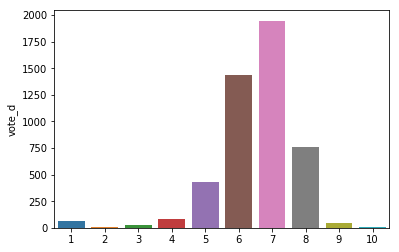

In [440]:
vote_list=target_y["vote_d"].value_counts()
vote_df=pd.DataFrame(vote_list)
sns.barplot(x=vote_list.index,y="vote_d",data=vote_df)


/opt/anaconda3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


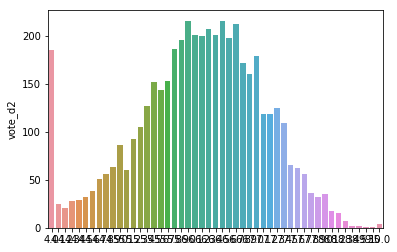

In [449]:
target_y["vote_d2"]=target_y["vote_average"].map(lambda x: x if x>4 else 4)
vote_list=target_y["vote_d2"].value_counts()
vote_df=pd.DataFrame(vote_list)
sns.barplot(x=vote_list.index,y="vote_d2",data=vote_df)

In [460]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import GridSearchCV

In [453]:
y_actual=target_y.vote_d2.values
# dtrain= xgb.DMatrix(input_arr.values,label=target_y.vote_average.values, missing=-99999999)
dtrain= xgb.DMatrix(input_arr.values,label=y_actual, missing=-99999999)


In [459]:
max_depth=6
eta=0.01
lambdas=1.0
min_child_weight=100
cst=0.1
subsample=0.9
param = {'max_depth':max_depth, 'eta':eta, 'silent':1, 'nthread':24,'objective':'reg:linear',#'multi:softmax',#'binary:logistic',
         'lambda':lambdas,'min_child_weight':min_child_weight,'colsample_bytree':cst,
         'scale_pos_weight':1,'subsample':subsample}                    
plst=param.items()
# plst += [('eval_metric','auc')]
# plst += [('eval_metric', 'logloss')]
# watchlist = [(dtrain, 'ins'),(dtest, 'oos')]
watchlist = [(dtrain, 'ins')]
num_rounds=2000

evals_result={}
model  = xgb.train(plst,dtrain,num_rounds,evals=watchlist,early_stopping_rounds=500,evals_result=evals_result,verbose_eval=1)


# ins_y_hat = model.predict(dtrain,ntree_limit=model.best_iteration)
# ins_rmse = sqrt(mean_squared_error(y_actual, ins_y_hat))
# print("INS R square: ",ins_rmse)

[0]	ins-rmse:5.68525
Will train until ins-rmse hasn't improved in 500 rounds.
[1]	ins-rmse:5.62993
[2]	ins-rmse:5.57521
[3]	ins-rmse:5.52102
[4]	ins-rmse:5.46748
[5]	ins-rmse:5.41435
[6]	ins-rmse:5.36181
[7]	ins-rmse:5.30986
[8]	ins-rmse:5.25846
[9]	ins-rmse:5.20766
[10]	ins-rmse:5.1572
[11]	ins-rmse:5.10734
[12]	ins-rmse:5.0579
[13]	ins-rmse:5.00905
[14]	ins-rmse:4.96073
[15]	ins-rmse:4.91289
[16]	ins-rmse:4.86555
[17]	ins-rmse:4.81881
[18]	ins-rmse:4.77247
[19]	ins-rmse:4.72656
[20]	ins-rmse:4.68105
[21]	ins-rmse:4.6359
[22]	ins-rmse:4.59137
[23]	ins-rmse:4.54736
[24]	ins-rmse:4.50385
[25]	ins-rmse:4.46077
[26]	ins-rmse:4.41805
[27]	ins-rmse:4.37588
[28]	ins-rmse:4.3341
[29]	ins-rmse:4.29269
[30]	ins-rmse:4.25151
[31]	ins-rmse:4.21104
[32]	ins-rmse:4.17106
[33]	ins-rmse:4.13143
[34]	ins-rmse:4.09225
[35]	ins-rmse:4.05345
[36]	ins-rmse:4.015
[37]	ins-rmse:3.97696
[38]	ins-rmse:3.93933
[39]	ins-rmse:3.90183
[40]	ins-rmse:3.86495
[41]	ins-rmse:3.82846
[42]	ins-rmse:3.79237
[43]	ins-rmse

[356]	ins-rmse:0.858334
[357]	ins-rmse:0.857888
[358]	ins-rmse:0.857381
[359]	ins-rmse:0.856994
[360]	ins-rmse:0.856391
[361]	ins-rmse:0.855923
[362]	ins-rmse:0.85551
[363]	ins-rmse:0.855116
[364]	ins-rmse:0.854591
[365]	ins-rmse:0.854214
[366]	ins-rmse:0.853867
[367]	ins-rmse:0.853455
[368]	ins-rmse:0.853024
[369]	ins-rmse:0.852727
[370]	ins-rmse:0.852369
[371]	ins-rmse:0.852004
[372]	ins-rmse:0.851685
[373]	ins-rmse:0.851354
[374]	ins-rmse:0.850852
[375]	ins-rmse:0.850368
[376]	ins-rmse:0.850049
[377]	ins-rmse:0.849599
[378]	ins-rmse:0.849252
[379]	ins-rmse:0.848947
[380]	ins-rmse:0.848683
[381]	ins-rmse:0.847678
[382]	ins-rmse:0.847412
[383]	ins-rmse:0.847125
[384]	ins-rmse:0.846821
[385]	ins-rmse:0.845927
[386]	ins-rmse:0.845659
[387]	ins-rmse:0.845307
[388]	ins-rmse:0.845067
[389]	ins-rmse:0.844852
[390]	ins-rmse:0.844537
[391]	ins-rmse:0.844328
[392]	ins-rmse:0.844067
[393]	ins-rmse:0.843704
[394]	ins-rmse:0.843301
[395]	ins-rmse:0.843056
[396]	ins-rmse:0.842733
[397]	ins-rmse:0.

[700]	ins-rmse:0.791601
[701]	ins-rmse:0.791316
[702]	ins-rmse:0.791244
[703]	ins-rmse:0.791176
[704]	ins-rmse:0.791122
[705]	ins-rmse:0.791052
[706]	ins-rmse:0.790988
[707]	ins-rmse:0.790915
[708]	ins-rmse:0.79082
[709]	ins-rmse:0.790769
[710]	ins-rmse:0.790682
[711]	ins-rmse:0.790629
[712]	ins-rmse:0.790453
[713]	ins-rmse:0.790323
[714]	ins-rmse:0.789944
[715]	ins-rmse:0.78989
[716]	ins-rmse:0.789809
[717]	ins-rmse:0.789707
[718]	ins-rmse:0.789655
[719]	ins-rmse:0.789325
[720]	ins-rmse:0.789238
[721]	ins-rmse:0.789176
[722]	ins-rmse:0.789104
[723]	ins-rmse:0.789016
[724]	ins-rmse:0.788928
[725]	ins-rmse:0.788865
[726]	ins-rmse:0.788809
[727]	ins-rmse:0.788628
[728]	ins-rmse:0.788544
[729]	ins-rmse:0.788453
[730]	ins-rmse:0.788376
[731]	ins-rmse:0.788308
[732]	ins-rmse:0.787938
[733]	ins-rmse:0.787909
[734]	ins-rmse:0.787853
[735]	ins-rmse:0.78751
[736]	ins-rmse:0.78741
[737]	ins-rmse:0.787349
[738]	ins-rmse:0.787264
[739]	ins-rmse:0.78719
[740]	ins-rmse:0.78714
[741]	ins-rmse:0.78710

[1042]	ins-rmse:0.761562
[1043]	ins-rmse:0.7615
[1044]	ins-rmse:0.761449
[1045]	ins-rmse:0.761387
[1046]	ins-rmse:0.761287
[1047]	ins-rmse:0.76116
[1048]	ins-rmse:0.761129
[1049]	ins-rmse:0.761038
[1050]	ins-rmse:0.760992
[1051]	ins-rmse:0.760957
[1052]	ins-rmse:0.760937
[1053]	ins-rmse:0.7609
[1054]	ins-rmse:0.760708
[1055]	ins-rmse:0.760652
[1056]	ins-rmse:0.76063
[1057]	ins-rmse:0.760574
[1058]	ins-rmse:0.760549
[1059]	ins-rmse:0.760507
[1060]	ins-rmse:0.760463
[1061]	ins-rmse:0.760358
[1062]	ins-rmse:0.760294
[1063]	ins-rmse:0.760143
[1064]	ins-rmse:0.760086
[1065]	ins-rmse:0.760044
[1066]	ins-rmse:0.759921
[1067]	ins-rmse:0.759876
[1068]	ins-rmse:0.75975
[1069]	ins-rmse:0.75969
[1070]	ins-rmse:0.759642
[1071]	ins-rmse:0.759624
[1072]	ins-rmse:0.759573
[1073]	ins-rmse:0.759507
[1074]	ins-rmse:0.759502
[1075]	ins-rmse:0.759464
[1076]	ins-rmse:0.759439
[1077]	ins-rmse:0.759357
[1078]	ins-rmse:0.75931
[1079]	ins-rmse:0.759287
[1080]	ins-rmse:0.75923
[1081]	ins-rmse:0.759194
[1082]	ins

[1372]	ins-rmse:0.740577
[1373]	ins-rmse:0.740528
[1374]	ins-rmse:0.74046
[1375]	ins-rmse:0.740384
[1376]	ins-rmse:0.740331
[1377]	ins-rmse:0.7403
[1378]	ins-rmse:0.740066
[1379]	ins-rmse:0.740028
[1380]	ins-rmse:0.739961
[1381]	ins-rmse:0.739939
[1382]	ins-rmse:0.739906
[1383]	ins-rmse:0.739867
[1384]	ins-rmse:0.739847
[1385]	ins-rmse:0.73979
[1386]	ins-rmse:0.73975
[1387]	ins-rmse:0.739701
[1388]	ins-rmse:0.739665
[1389]	ins-rmse:0.739588
[1390]	ins-rmse:0.739532
[1391]	ins-rmse:0.739411
[1392]	ins-rmse:0.739352
[1393]	ins-rmse:0.739332
[1394]	ins-rmse:0.739276
[1395]	ins-rmse:0.739206
[1396]	ins-rmse:0.739171
[1397]	ins-rmse:0.739141
[1398]	ins-rmse:0.739099
[1399]	ins-rmse:0.739046
[1400]	ins-rmse:0.738993
[1401]	ins-rmse:0.73892
[1402]	ins-rmse:0.738839
[1403]	ins-rmse:0.738766
[1404]	ins-rmse:0.738742
[1405]	ins-rmse:0.738688
[1406]	ins-rmse:0.738647
[1407]	ins-rmse:0.738611
[1408]	ins-rmse:0.738575
[1409]	ins-rmse:0.738557
[1410]	ins-rmse:0.738542
[1411]	ins-rmse:0.738446
[1412]

[1702]	ins-rmse:0.723111
[1703]	ins-rmse:0.723074
[1704]	ins-rmse:0.723059
[1705]	ins-rmse:0.723034
[1706]	ins-rmse:0.723
[1707]	ins-rmse:0.722941
[1708]	ins-rmse:0.72284
[1709]	ins-rmse:0.722708
[1710]	ins-rmse:0.722592
[1711]	ins-rmse:0.722571
[1712]	ins-rmse:0.722547
[1713]	ins-rmse:0.722484
[1714]	ins-rmse:0.722447
[1715]	ins-rmse:0.722427
[1716]	ins-rmse:0.72235
[1717]	ins-rmse:0.722324
[1718]	ins-rmse:0.72224
[1719]	ins-rmse:0.722189
[1720]	ins-rmse:0.722069
[1721]	ins-rmse:0.722029
[1722]	ins-rmse:0.721979
[1723]	ins-rmse:0.721919
[1724]	ins-rmse:0.721861
[1725]	ins-rmse:0.721819
[1726]	ins-rmse:0.721764
[1727]	ins-rmse:0.721716
[1728]	ins-rmse:0.721598
[1729]	ins-rmse:0.721558
[1730]	ins-rmse:0.721416
[1731]	ins-rmse:0.721383
[1732]	ins-rmse:0.721349
[1733]	ins-rmse:0.721284
[1734]	ins-rmse:0.721263
[1735]	ins-rmse:0.721212
[1736]	ins-rmse:0.721136
[1737]	ins-rmse:0.721076
[1738]	ins-rmse:0.721027
[1739]	ins-rmse:0.720994
[1740]	ins-rmse:0.720908
[1741]	ins-rmse:0.720847
[1742]